# Project Name : Sales Analysis 
# Team Members:
1) Syed Ibrahim (DEVELOPER AND TESTER) <br>
2) Varsha Ravi (SCRUM MASTER AND DEVELOPER)<br>
3) Leena(TESTER)<br>
4) Shiblee<br>

## Objective:
To Understand the Dataset and identify in which part there is more revenue. For Example, which country has more revenue and which country as less revenue.<br>
After that We have to understand why that particular part has more revenue.<br>
Predict the future revenue for that product and country<br>
Use logistic regression and time series analsis for prediction<br>
Use k means clustering for Segmentation by countries and revenues<br>

## Steps<br>
### Step 1: Data Exploration and Preprocessing<br>
### Load the Dataset:<br>

Load the dataset into a Pandas DataFrame.<br>
Ensure that data types for columns like Revenue, Country, Year, etc., are correct.<br>
### Check for Missing Data:<br>

Identify and handle missing data (use imputation or remove rows with missing values).<br>
### Data Cleaning:<br>

Remove any duplicates.<br>
Format the data (e.g., convert Revenue column to numeric if necessary).<br>
Standardize column names (remove spaces, special characters, etc.).<br>
### Exploratory Data Analysis (EDA):<br>

Visualize distributions of key columns (e.g., Revenue, Country, Year).<br>
Identify outliers using box plots or histograms.<br>
Identify correlations between variables (Revenue vs. Country, Year, etc.).<br>
## Step 2: Revenue Analysis by Country<br>
### Group the data by Country and calculate the total revenue for each country.<br>
Sort the countries by total revenue to identify the ones with the highest and lowest revenue.<br>
### Visualize Revenue by Country:<br>

Create bar plots to visualize the revenue by country.<br>
You can use a horizontal bar chart if the country names are long.<br>
### Identify Key Factors Behind High/Low Revenue:<br>

Examine other columns (e.g., Product, Year, Market Share) to see if they correlate with higher or lower revenue.<br>
Perform statistical tests to analyze if certain factors (e.g., specific product categories or regions) are influencing the revenue significantly.<br>
### Identify Trends Over Time:<br>

Group the data by Country and Year, and analyze how the revenue trends over time (e.g., increasing or decreasing).<br>
Create line plots to compare the revenue over time across countries.<br>
## Revenue Forecasting for Future<br>
### Time Series Analysis (For Predicting Future Revenue):<br>
Select a Country: Choose one country with significant revenue to forecast.<br>
Prepare Time Series Data: Convert the data into a time series format (i.e., Year as the time component and Revenue as the target).<br>
Train a Time Series Model:<br>
Use ARIMA (Auto-Regressive Integrated Moving Average), SARIMA, or Prophet for time series forecasting.<br>
Train the model on historical revenue data for the selected country and predict future revenue for the coming years.<br>
### Logistic Regression (If Applicable for Revenue Prediction):<br>
#### Feature Engineering:<br>
Create features like Year, Product Category, Country (encoded), and any other relevant features.<br>
#### Model Training:<br>
Use logistic regression to predict whether the revenue will be above or below a certain threshold (binary classification).<br>
#### Evaluate the Model:<br>
Evaluate the model’s performance using metrics like accuracy, precision, recall, and ROC-AUC.<br>
## Segmentation Using K-Means Clustering<br>
### Data Preparation for Clustering:<br>
Select relevant features such as Country, Revenue, Year, and any other features that could contribute to segmentation.<br>
Normalize/scale the data (e.g., using StandardScaler or MinMaxScaler from scikit-learn).<br>
### Determine Optimal Number of Clusters:<br>
Use the Elbow Method or Silhouette Score to determine the optimal number of clusters for the K-Means algorithm.<br>
#### Apply K-Means Clustering:<br>
Run the K-Means clustering algorithm on the data with the chosen number of clusters.<br>
Analyze the characteristics of each cluster (i.e., which countries or revenue groups belong to which cluster).<br>
### Visualize the Clusters:<br>
Create scatter plots or other visualizations to see how the countries are distributed across different clusters.<br>


### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()

### Load The Dataset

In [2]:
data = pd.read_csv("C:\\Users\\Ibrahim\\Videos\\Online Retail Data Set.csv",encoding = 'latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Initial Data Exploration Steps

In [3]:
#dimensions of the dataset
data.shape  

(541909, 8)

### Our Data contains 541910 rows and 8 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


###  By looking at Info about Dataset it contains Null-values in description and CustomerID
### 5 Category Columns and 3 Numeric Columns

In [5]:
data.dtypes  #checking DataTypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
data.nunique()   #returns the number of unique values in each column 

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### We can take Category columns into consideration for checking unique values 

In [7]:
data.isnull().sum()      #count the number of missing values in each column 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Customer Id contains More number of null values so we have to remove it and for Description We can remove null rows which is very low

### Copy the Original Dataset

In [8]:
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
df.describe()                               #Gives Statistics about numeric columns in the dataset

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Insights
1) Customer ID contains null-values.<br>
2) The Average values of Quantity and UnitPrice are 9.55 and 4.61.<br>
3) The Min values of Quantiy is in negative which means it is an Outlier because Quantity cannot be less than 0 and UnitPrice also.<br>
4) The Max values of Quantity and Unitprice may be the outliers because 75 percentile of the data is less than 10 how can the remaining 25% is that much high.<br>
5) 25% of the Data is less than 1 for Quantity and 1.25% of the Data is less than 1 for UnitPrice.<br>
6) 50% of the Data is less than 3 for Quantity and 50% of the Data is less than 2 for UnitPrice.<br>
7) 75% of the Data is less than 10 for Quantity and 1.25% of the Data is less than 4.13 for UnitPrice. The range between 50% and 75% of Quantity is High so maybe the distributions are long in that part.<br>


In [10]:
df.describe(include = 'all')  #Gives Statistics about the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### Insights
1) The Top value is given only for Categorical columns and not a numbers columns} which returns the first row in the Dataset.<br>
2) The Nan means Not a Number which represents categorical or sentences and letters.<br>
3) The freq row indicates the first row frequency count.<br>
4) The Unique column gives the total number of Unique rows in each column.<br>

In [11]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Calculate frequency for each categorical column
for col in categorical_columns:
    print(f"Frequency in column '{col}':")
    print(df[col].value_counts(dropna=False))  # Include NaN counts
    print()


Frequency in column 'InvoiceNo':
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

Frequency in column 'StockCode':
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

Frequency in column 'Description':
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CH

In [12]:
df.select_dtypes(include=['number']).skew()

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

The skew is in negative so after data cleaning we will check

In [13]:
df['Country'].unique()  #Identify what are the unique rows in country column

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [14]:
#Identify the total number of unique countries
unique_country_count = df['Country'].nunique()
print("Number of unique countries:", unique_country_count)


Number of unique countries: 38


## Data Cleaning

### Handling Null Values

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [16]:
print("Before Cleaning Null Values")
print(df.isnull().sum())

# Drop the 'CustomerID' column and reassign to df
df = df.drop('CustomerID', axis=1)

# Drop rows where 'Description' is null, modifying df in place
df.dropna(subset=['Description'], axis=0, inplace=True)

# If 'Revenue' column does not exist, create it
if 'Revenue' not in df.columns:
    df['Revenue'] = df['Quantity'] * df['UnitPrice']

print("After Cleaning Null Values")
print(df.isnull().sum())


Before Cleaning Null Values
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
After Cleaning Null Values
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
Revenue        0
dtype: int64


### Insights 
 We removed CustomerID which has vey large no of null-values and we removed null values from description.<br>


In [17]:
df.shape

(540455, 8)

In [18]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,France,14.85


The row index did not change so we have to reset it

In [19]:
df.reset_index(drop=True, inplace=True)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France,10.20
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France,12.60
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France,16.60
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France,16.60
540454,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,France,14.85


In [20]:
df.describe(include = 'all')  #statistics after dealing with null-values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue
count,540455,540455,540455,540455.000000,540455,540455.000000,540455,540455.000000
unique,24446,3958,4223,NaN,22309,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,1114,NaN,494024,NaN
mean,NaN,NaN,NaN,9.603129,NaN,4.623519,NaN,18.036188
std,NaN,NaN,NaN,218.007598,NaN,96.889628,NaN,379.318894
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,-168469.600000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,3.480000
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,NaN,9.840000
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,NaN,17.400000


### Insights
1) The count of all columns are same means no null values present in the data now.<br>
2) The revenue column is newly added but the min value in negative. It can't be loss because we don't have loss column.<br>
3) The standard deviations are relatively high, showing a large spread in the data.<br>
4) For example, a standard deviation of 218.007598 means the data in that Quantiy column can deviate widely from its mean of 9.603129.


### Removing duplicates by adding temporary column and concatenating it

In [21]:
# Add a temporary concatenated column
df["concat"] = df.astype(str).agg("-".join, axis=1)


In [22]:
df['concat'].info

<bound method Series.info of 0         536365-85123A-WHITE HANGING HEART T-LIGHT HOLD...
1         536365-71053-WHITE METAL LANTERN-6-01-12-2010 ...
2         536365-84406B-CREAM CUPID HEARTS COAT HANGER-8...
3         536365-84029G-KNITTED UNION FLAG HOT WATER BOT...
4         536365-84029E-RED WOOLLY HOTTIE WHITE HEART.-6...
                                ...                        
540450    581587-22613-PACK OF 20 SPACEBOY NAPKINS-12-09...
540451    581587-22899-CHILDREN'S APRON DOLLY GIRL -6-09...
540452    581587-23254-CHILDRENS CUTLERY DOLLY GIRL -4-0...
540453    581587-23255-CHILDRENS CUTLERY CIRCUS PARADE-4...
540454    581587-22138-BAKING SET 9 PIECE RETROSPOT -3-0...
Name: concat, Length: 540455, dtype: object>

In [23]:
df.shape

(540455, 9)

Concat column is added

In [24]:
# Drop duplicates based on the concatenated column
df = df.drop_duplicates(subset="concat")


In [1]:
df

NameError: name 'df' is not defined

### Reset Index because the index for deleted rows not updated

In [26]:
# Reset the index
df = df.reset_index(drop=True)
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue,concat
535182,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France,10.20,581587-22613-PACK OF 20 SPACEBOY NAPKINS-12-09...
535183,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France,12.60,581587-22899-CHILDREN'S APRON DOLLY GIRL -6-09...
535184,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France,16.60,581587-23254-CHILDRENS CUTLERY DOLLY GIRL -4-0...
535185,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France,16.60,581587-23255-CHILDRENS CUTLERY CIRCUS PARADE-4...
535186,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,France,14.85,581587-22138-BAKING SET 9 PIECE RETROSPOT -3-0...


### Removing Temporary Column

In [27]:
df = df.drop(columns="concat")
df.shape

(535187, 8)

### Changing Data Types

In [28]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Convert 'Quantity' and 'UnitPrice' to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Convert categorical variables like 'Description' and 'Country' to category type
df['Description'] = df['Description'].astype('category')
df['Country'] = df['Country'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['InvoiceNo'] = df['InvoiceNo'].astype('category')

# Check the data types to verify the changes
print(df.dtypes)

InvoiceNo            category
StockCode            category
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country              category
Revenue               float64
dtype: object


### Creating New Columns (Year, Month, Week, Day)

In [29]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.isocalendar().week
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

df.shape

(535187, 13)

In [30]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Revenue', 'Year', 'Month', 'Week', 'DayOfWeek',
       'Hour'],
      dtype='object')

### Remove records with zero or negative amounts


In [31]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(df.shape)

df = df.drop('Revenue', axis = 1)
df.shape


(524878, 13)


(524878, 12)

In [32]:
df.describe()

,Quantity,UnitPrice,Year,Month,Week,DayOfWeek,Hour
count,524878.000000,524878.000000,524878.000000,524878.000000,524878.0,524878.000000,524878.000000
mean,10.616600,3.922573,2010.921904,6.920126,28.1763,2.692155,13.073991
std,156.280031,36.093028,0.268323,3.363854,14.728286,1.941777,2.442994
min,1.000000,0.001000,2010.000000,1.000000,1.0,0.000000,6.000000
25%,1.000000,1.250000,2011.000000,4.000000,16.0,1.000000,11.000000
50%,4.000000,2.080000,2011.000000,7.000000,29.0,3.000000,13.000000
75%,11.000000,4.130000,2011.000000,10.000000,42.0,4.000000,15.000000
max,80995.000000,13541.330000,2011.000000,12.000000,52.0,6.000000,20.000000


### Insights
1) The Negative values in minimum values of Quantity and UnitPrice are removed
2) The standard deviation is still higher than mean for UnitPrice and Quantity Columns means the data is widely distributed.So we have to remove unwanted Outliers


### We again adding revenue column to get the revenue without negative values

In [33]:

df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Check if any records remain after filtering
print(df.shape)
df.count()

(524878, 13)


InvoiceNo      524878
StockCode      524878
Description    524878
Quantity       524878
InvoiceDate    524878
UnitPrice      524878
Country        524878
Year           524878
Month          524878
Week           524878
DayOfWeek      524878
Hour           524878
Revenue        524878
dtype: int64

In [34]:
df.reset_index(drop=True, inplace=True)

In [35]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,2011,9,37,0,12,10.20
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,2011,9,37,0,12,12.60
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,2011,9,37,0,12,16.60
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,2011,9,37,0,12,16.60
524877,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,France,2011,9,37,0,12,14.85


### Boxplot Before Cleaning

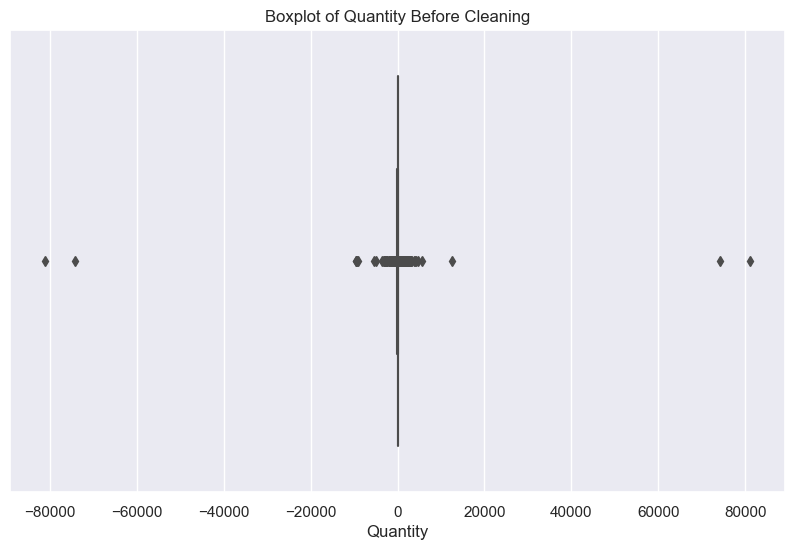

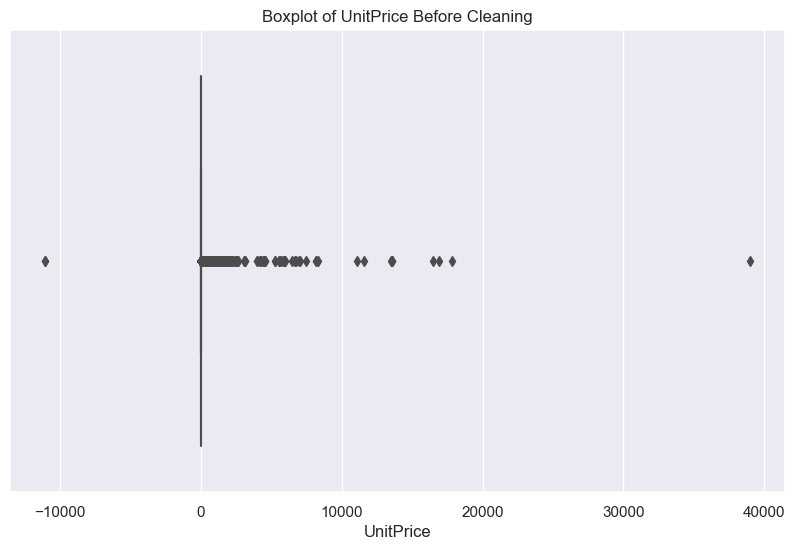

In [36]:
#Before Cleaning
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data=data)
plt.title('Boxplot of Quantity Before Cleaning')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='UnitPrice', data=data)
plt.title('Boxplot of UnitPrice Before Cleaning')
plt.show()

### Outlier Detection And Cleaning

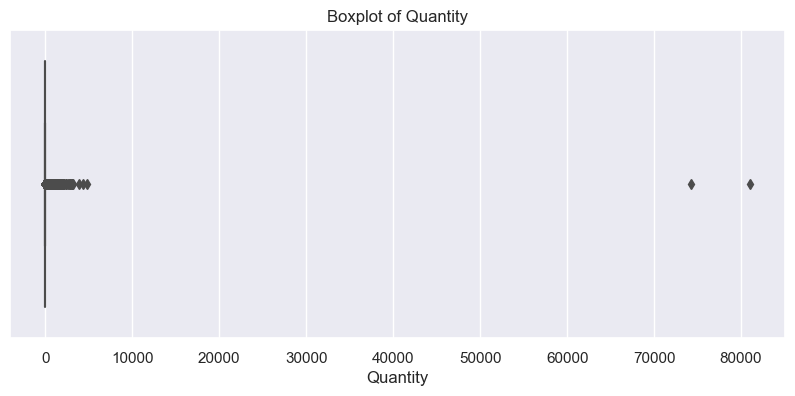

In [37]:
# Identifying Outliers using IQR (Interquartile Range)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_quantity = detect_outliers(df, 'Quantity')
outliers_unitprice = detect_outliers(data, 'UnitPrice')

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()



### Insights
1) In this boxplots there are so many outliers or it didn't standardize and normalize.<br> 
2) But most of the quantity are below 75% of the dataset.<br> 
3) The 75% is 11 for Quantity means 75% of data are below 11.<br> 
4) The remaining percentile is the outliers.<br> 

### Recommendations
1. Cap the Outliers (Winsorization)
2. Log Transformation
3. Adjust the Plot Scale


In [38]:
print("75th Quantile for Quantity:", df['Quantity'].quantile(q=0.75))
 # Prints the value below which 75% of the data lies

75th Quantile for Quantity: 11.0


In [39]:
print("99th Quantile for Quantity:", df['Quantity'].quantile(q=0.99))
# Prints the value below which 99% of the data lies

99th Quantile for Quantity: 100.0


In [40]:
print("100th Quantile for Quantity:", df['Quantity'].quantile(q=1))
  # Prints the value below which 100% of the data lies

100th Quantile for Quantity: 80995.0


### Insights 
1) The difference between 99 percentile and 100 percentile is very high.<br>
2) So we have to remove the remaining 1 percentile because that is an Outlier.<br>

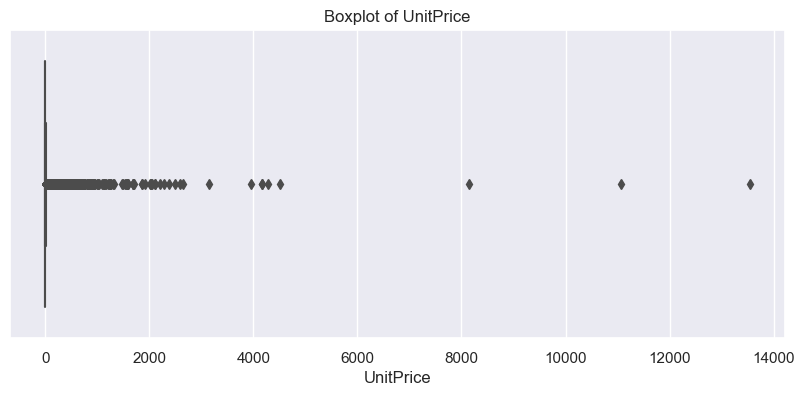

In [41]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()



In [42]:
print("75th Quantile for UnitPrice:", df['UnitPrice'].quantile(q=0.75))
 # Prints the value below which 75% of the data lies

75th Quantile for UnitPrice: 4.13


In [43]:
print("99th Quantile for UnitPrice:", df['UnitPrice'].quantile(q=0.99))
# Prints the value below which 99% of the data lies

99th Quantile for UnitPrice: 16.98


In [44]:
print("100th Quantile for UnitPrice:", df['UnitPrice'].quantile(q=1))
# Prints the value below which 100% of the data lies

100th Quantile for UnitPrice: 13541.33


### Insights
1) In this boxplots there are so many outliers or it didn't standardize and normalize.<br> 
2) But most of the Unitprice are below 75% of the dataset.<br> 
3) The 75% is 4 for Unitprice means 75% of data are below 4.<br> 
4) The remaining percentile is the outliers.<br> 
5) The difference between 99 percentile and 100 percentile is very high.<br>
6) So we have to remove the remaining 1 percentile because that is an Outlier.<br>

### Recommendations
1. Cap the Outliers (Winsorization)
2. Log Transformation
3. Adjust the Plot Scale

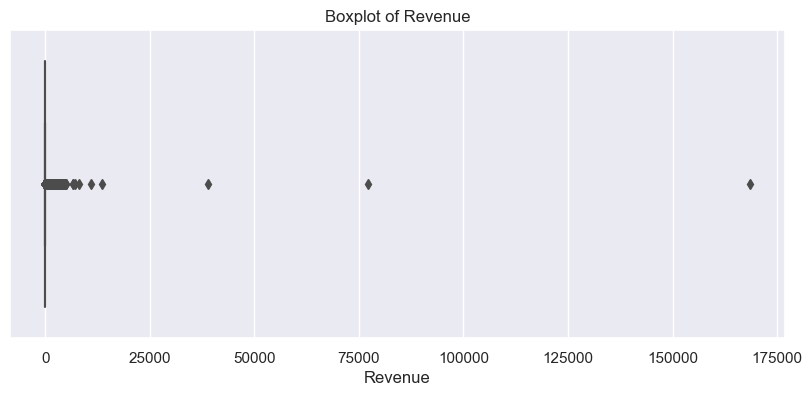

In [45]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Revenue'])
plt.title('Boxplot of Revenue')
plt.show()

In [46]:
print("75th Quantile for Revenue:", df['Revenue'].quantile(q=0.75))
 # Prints the value below which 75% of the data lies

75th Quantile for Revenue: 17.700000000000003


In [47]:
print("99th Quantile for Revenue:", df['Revenue'].quantile(q=0.99))
 # Prints the value below which 99% of the data lies

99th Quantile for Revenue: 183.60000000000002


In [48]:
print("100th Quantile for Revenue:", df['Revenue'].quantile(q=1))
 # Prints the value below which 100% of the data lies

100th Quantile for Revenue: 168469.6


### Insights
1) The difference between 99 percentile and 100 percentile is very high.<br>
2) So we have to remove the remaining 1 percentile because that is an Outlier.<br>

### Insights
1) In this boxplots there are so many outliers or it didn't standardize and normalize.<br> 
2) But most of the Unitprice are below 75% of the dataset.<br> 
3) The 75% is 17 for Unitprice means 75% of data are below 17.<br> 
4) The remaining percentile is the outliers.<br> 
5) The difference between 99 percentile and 100 percentile is very high.<br>
6) So we have to remove the remaining 1 percentile because that is an Outlier.<br>

### Recommendations
1. Cap the Outliers (Winsorization)
2. Log Transformation
3. Adjust the Plot Scale


## How to perform Winsorization
#### Define a threshold to cap outliers (e.g., 99th percentile)
cap_threshold = df['Quantity'].quantile(0.99)

#### Cap outliers
df['Capped_Quantity'] = df['Quantity'].clip(upper=cap_threshold)

#### Create boxplot
sns.boxplot(x=df['Capped_Quantity'])
plt.title('Boxplot of Capped Quantity')
plt.xlabel('Quantity')
plt.show()

#### Define a threshold to cap outliers (e.g., 99th percentile)
cap_threshold = df['UnitPrice'].quantile(0.99)

#### Cap outliers
df['Capped_UnitPrice'] = df['UnitPrice'].clip(upper=cap_threshold)

#### Create boxplot
sns.boxplot(x=df['Capped_UnitPrice'])
plt.title('Boxplot of Capped UnitPrice')
plt.xlabel('UnitPrice')
plt.show()

### Define a threshold to cap outliers (e.g., 99th percentile)
cap_threshold = df['Revenue'].quantile(0.99)

### Cap outliers
df['Capped_Revenue'] = df['Revenue'].clip(upper=cap_threshold)

### Create boxplot
sns.boxplot(x=df['Capped_Revenue'])
plt.title('Boxplot of Capped Revenue')
plt.xlabel('Revenue')
plt.show()

### Outlier Correction and Cleaning

In [49]:

data_cleaned = df[(df['Quantity'] >= (df['Quantity'].quantile(0.25) - 1.5 * (df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25)))) &
                             (df['Quantity'] <= (df['Quantity'].quantile(0.75) + 1.5 * (df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25))))]

data_cleaned = data_cleaned[(data_cleaned['UnitPrice'] >= (data_cleaned['UnitPrice'].quantile(0.25) - 1.5 * (data_cleaned['UnitPrice'].quantile(0.75) - data_cleaned['UnitPrice'].quantile(0.25)))) &
                             (data_cleaned['UnitPrice'] <= (data_cleaned['UnitPrice'].quantile(0.75) + 1.5 * (data_cleaned['UnitPrice'].quantile(0.75) - data_cleaned['UnitPrice'].quantile(0.25))))]

data_cleaned = data_cleaned[(data_cleaned['Revenue'] >= (data_cleaned['Revenue'].quantile(0.25) - 1.5 * (data_cleaned['Revenue'].quantile(0.75) - data_cleaned['Revenue'].quantile(0.25)))) &
                             (data_cleaned['Revenue'] <= (data_cleaned['Revenue'].quantile(0.75) + 1.5 * (data_cleaned['Revenue'].quantile(0.75) - data_cleaned['Revenue'].quantile(0.25))))]
# Now, data_cleaned will have the data with outliers removed

### Perfect Visualization of Box-Plot 

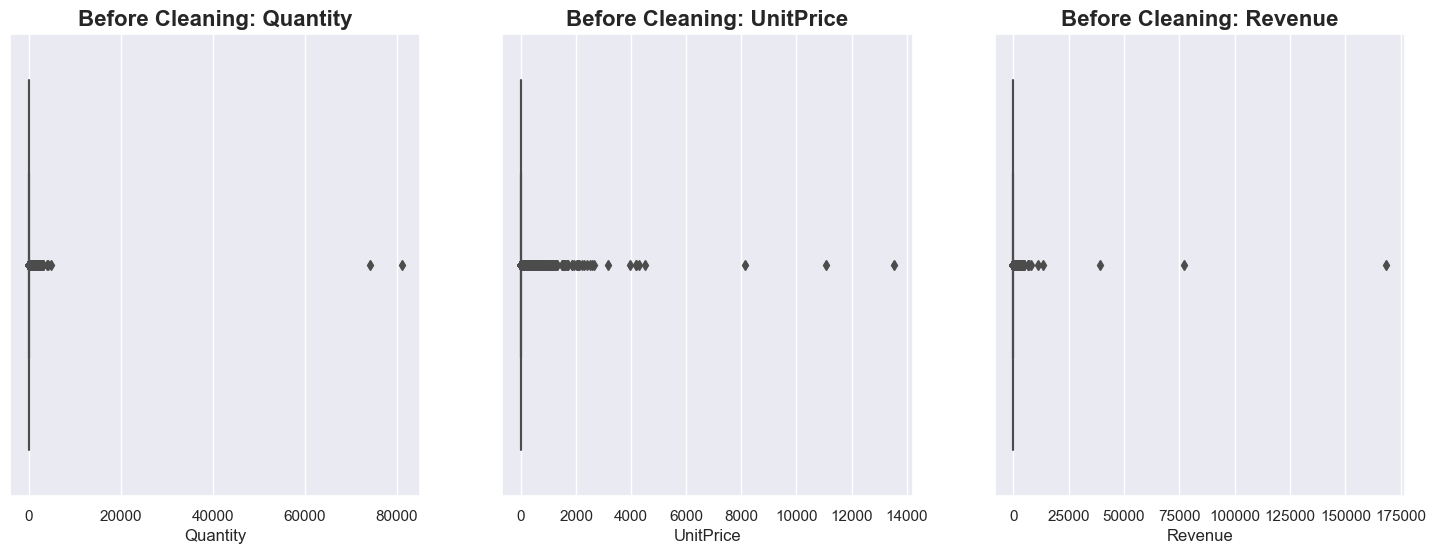

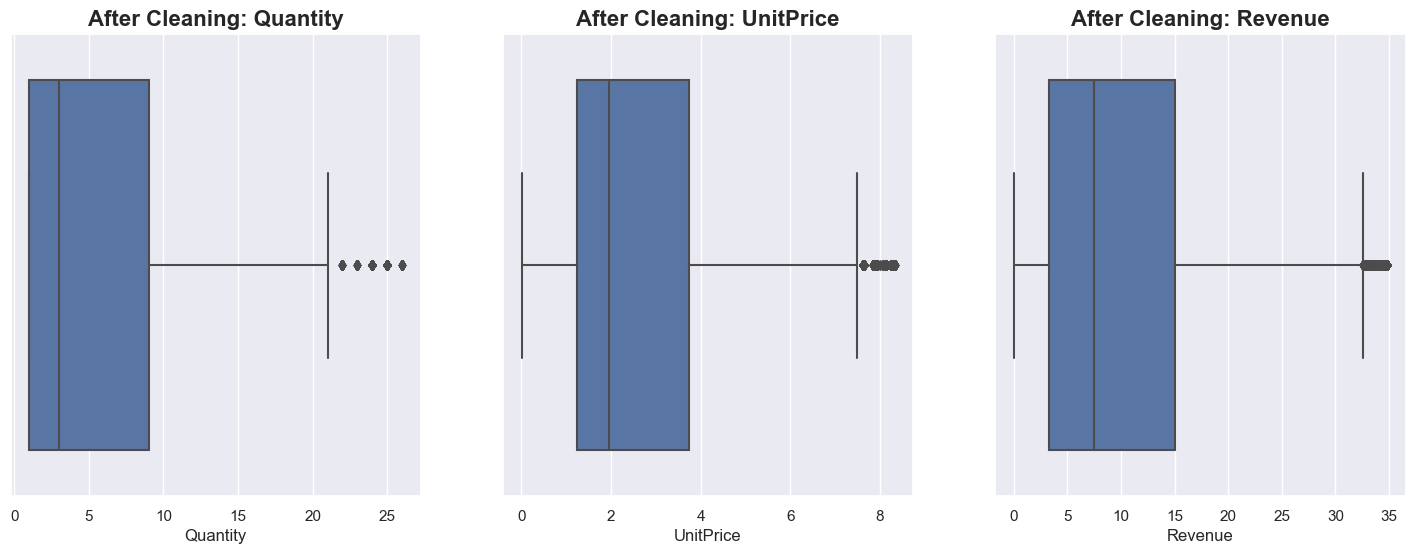

In [50]:
# Before cleaning (Box plot for Quantity, UnitPrice, and Revenue)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Before Cleaning: Quantity', fontsize = 16, fontweight = 'bold')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Before Cleaning: UnitPrice', fontsize = 16, fontweight = 'bold')

# Check if 'Revenue' exists in the dataframe, then plot
if 'Revenue' in df.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df['Revenue'])
    plt.title('Before Cleaning: Revenue', fontsize = 16, fontweight = 'bold')
else:
    print("Revenue column not found in the DataFrame")

plt.show()

# After cleaning (Box plot for Quantity, UnitPrice, and Revenue)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=data_cleaned['Quantity'])
plt.title('After Cleaning: Quantity', fontsize = 16, fontweight = 'bold')

plt.subplot(1, 3, 2)
sns.boxplot(x=data_cleaned['UnitPrice'])
plt.title('After Cleaning: UnitPrice', fontsize = 16, fontweight = 'bold')

# Check if 'Revenue' exists in the cleaned dataframe, then plot
if 'Revenue' in data_cleaned.columns:
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data_cleaned['Revenue'])
    plt.title('After Cleaning: Revenue', fontsize = 16, fontweight = 'bold')
else:
    print("Revenue column not found in the cleaned DataFrame")

plt.show()


### Insights

#### Understand Boxplot
1) The box in blue colour is the Interquantile range where 50 percentile of data are present(Lowes End = 1st Quantile, Highest End = 3rd Quantile).<br>
2) The values below Q1(1st Quantile) to that line and above Q3(3rd Quantile) to that line are 25% and 25% of Data.<br>
3) The values outside Min ans Max line (the two lines) are outliers<br>
4) The line Inside the box is Median<br>
### What it Indicates in Ours
1) Quantity:<br>
The Box Interquantile range is approx from 1 to 9<br>
The Median is around 3<br>
The Max value is 21<br>
The values above 21 are Outliers<br>

2) UnitPrice<br>
The Box Interquantile range is approx from 1.5 to 3.8<br>
The Median is around 2<br>
The Min and Max values are 0 and 7.5 <br>
The values above 7.5 are Outliers<br>

2) Revenue<br>
The Box Interquantile range is approx from 5 to 15<br>
The Median is around 8<br>
The Min and Max values are 0 and 33 <br>
The values above 33 are Outliers<br>


## Statistics

### Measures Of Central Tendency (Mean, Median, Mode)

In [51]:
data_cleaned[['Quantity', 'UnitPrice', 'Revenue']].mean() # The Average values for the Variables 

Quantity     5.755997
UnitPrice    2.526517
Revenue      9.666770
dtype: float64

In [52]:
data_cleaned[['Quantity', 'UnitPrice', 'Revenue']].median() # The Mid values for the variables

Quantity     3.00
UnitPrice    1.95
Revenue      7.50
dtype: float64

##### The data is Right Skewed Mean>Median

### Mode

In [53]:
print(data_cleaned[['Quantity', 'UnitPrice', 'Revenue']].mode())

   Quantity  UnitPrice  Revenue
0         1       1.25     15.0


### Insights
Our most sold Quantity and UnitPrice is 1 and 1.25<br>
We mostly get 15 rupess as Revenue <br>


### Variance

In [54]:
data_cleaned.var(numeric_only=True)

Quantity      36.914137
UnitPrice      3.609506
Year           0.069548
Month         11.303826
Week         216.795392
DayOfWeek      3.806881
Hour           5.871139
Revenue       59.564555
dtype: float64

### Standard Deviation

In [55]:
std = data_cleaned[['Quantity', 'UnitPrice', 'Revenue']].std()
mean = data_cleaned[['Quantity', 'UnitPrice', 'Revenue']].mean()
# Create a new DataFrame
df_new = pd.DataFrame({
    'Metric': ['Standard Deviation', 'Mean'],  
    'Quantity': [std['Quantity'], mean['Quantity']],
    'UnitPrice': [std['UnitPrice'], mean['UnitPrice']],
    'Revenue': [std['Revenue'], mean['Revenue']]
})

print(df_new)


               Metric  Quantity  UnitPrice   Revenue
0  Standard Deviation  6.075701   1.899870  7.717808
1                Mean  5.755997   2.526517  9.666770


### Insights
The std is very high for quantity, means it is largely distributed<br>
For Unitprice and revenue it is ok 

### Covariance and Correlation

In [56]:
data_cleaned[['Revenue', 'Quantity','UnitPrice']].cov()


,Revenue,Quantity,UnitPrice
Revenue,59.564555,24.890737,3.445402
Quantity,24.890737,36.914137,-4.875867
UnitPrice,3.445402,-4.875867,3.609506


### Insights
1) The Values for Revenue vs Quantity and Revenue vs UnitPrice are positive means the direction of that two variables is same. So it is positively Correlated. If Quantity and UnitPrice Increases, the Revenue will Automatically Increases. <br>
2) The Values of Quantity vs UnitPrice are negayive means the direction of those variables are Opposite. So it is Negatively Correlated. If UnitPrice Increases the people who will buy the product at low price decreases.<br>

In [57]:
data_cleaned[['Revenue', 'Quantity','UnitPrice']].corr()


,Revenue,Quantity,UnitPrice
Revenue,1.000000,0.530820,0.234975
Quantity,0.530820,1.000000,-0.422408
UnitPrice,0.234975,-0.422408,1.000000


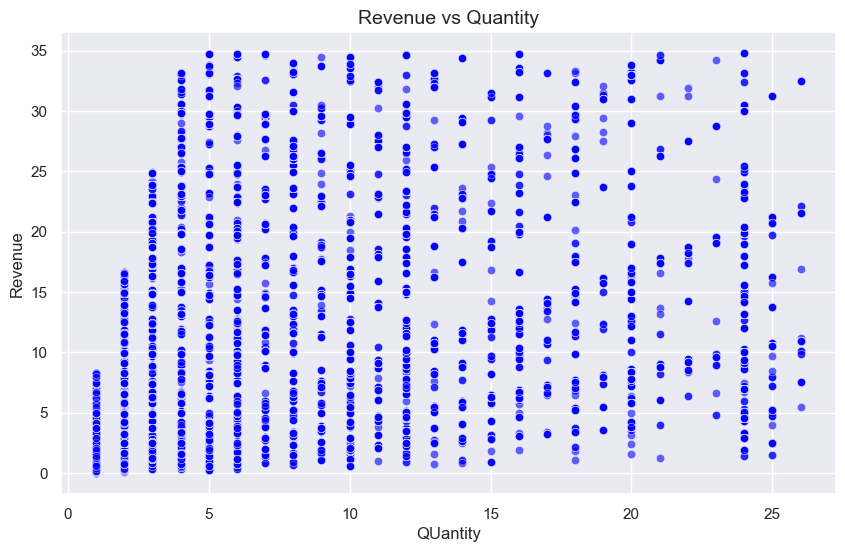

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='Quantity', y='Revenue', color='blue', alpha=0.6)

# Add title and labels
plt.title("Revenue vs Quantity", fontsize=14)
plt.xlabel("QUantity", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.show()

### Insights
1) Revenue Increases Quantity also Increases<br>
2) We cant say whether it is positive or negative correlation because it does not look like that. <br>
3) The dotted reading lines between 0 to 5 Quantity and 0 to 10 Revenue are more means Our customer like to buy products which Quantity is less and which product has the a lowest price that they can save money.<br>
4) Most of the customers buy low amount of quantity because there is no need to buy all that like there is a Natural Disaster<br>


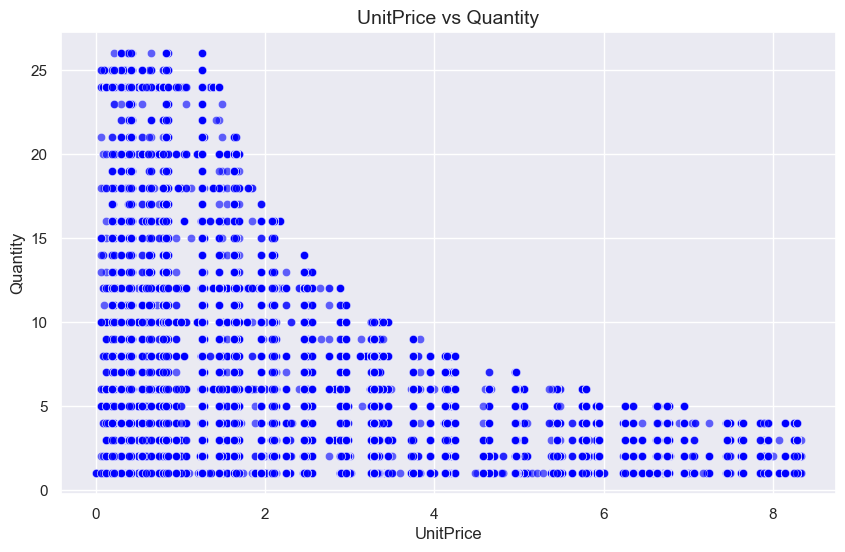

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='UnitPrice', y='Quantity', color='blue', alpha=0.6)

# Add title and labels
plt.title("UnitPrice vs Quantity", fontsize=14)
plt.xlabel("UnitPrice", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.show()

### Insights
As the UnitPrice Increase the customers who bought large number of products Decreases

(array([2.2978e+05, 4.7083e+04, 5.2369e+04, 2.2136e+04, 5.6012e+04,
        8.7900e+02, 4.0870e+03, 3.3450e+03, 1.7900e+02, 2.3940e+04]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

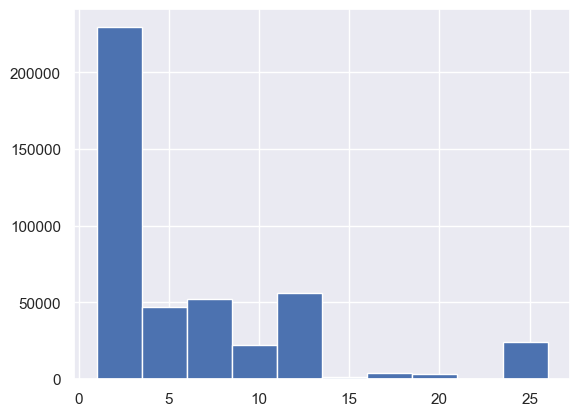

In [60]:
plt.hist(data_cleaned['Quantity'])

### Insights
1 to 4 is the most bought companies products because they dont want to have all the products at home.So There is no disaster and Problems to bought at bundle<br>
Above 13 are only buy for disaster or maybe there is no one for them to buy the product so they bought it as bundle(maybe old age persons).<br>


(array([ 69931., 137932.,  65552.,  53661.,  41530.,  29719.,   9075.,
         10535.,   5700.,  16175.]),
 array([1.0000e-03, 8.3390e-01, 1.6668e+00, 2.4997e+00, 3.3326e+00,
        4.1655e+00, 4.9984e+00, 5.8313e+00, 6.6642e+00, 7.4971e+00,
        8.3300e+00]),
 <BarContainer object of 10 artists>)

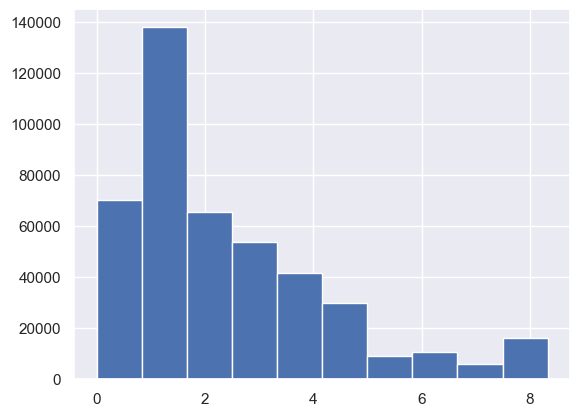

In [61]:
plt.hist(data_cleaned['UnitPrice'])

(array([121817.,  91249.,  62165.,  32561.,  60872.,  38397.,   8053.,
          9891.,   9675.,   5130.]),
 array([1.00000e-03, 3.48090e+00, 6.96080e+00, 1.04407e+01, 1.39206e+01,
        1.74005e+01, 2.08804e+01, 2.43603e+01, 2.78402e+01, 3.13201e+01,
        3.48000e+01]),
 <BarContainer object of 10 artists>)

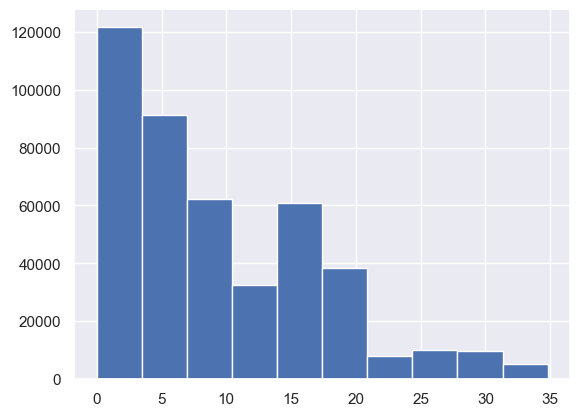

In [62]:
plt.hist(data_cleaned['Revenue'])

Right skewed<br>
People most likely the but the product which has low price seems true<br>
The rich people only buy costly products so it is low<br>
poor people and middle class is more than Rich people

In [63]:
col = data_cleaned["Revenue"]

# Calculate Mean and Median
mean = col.mean()
median = col.median()

print("Mean:", mean)
print("Median:", median)

# Determine skewness
if mean > median:
    print("The data is right-skewed (Positive skew).")
elif mean < median:
    print("The data is left-skewed (Negative skew).")
else:
    print("The data is approximately symmetrical.")

Mean: 9.666770296264295
Median: 7.5
The data is right-skewed (Positive skew).


# Log transformation
df["Log_Revenue"] = np.log1p(df["Revenue"])  # log1p handles zeros by computing log(1 + x)

# Plot histogram of log-transformed data
plt.figure(figsize=(8, 6))
sns.histplot(df["Log_Revenue"], kde=True, bins=10, color="skyblue", edgecolor="black")
plt.axvline(np.log1p(mean), color="red", linestyle="--", label=f"Mean (Log): {np.log1p(mean):.2f}")
plt.axvline(np.log1p(median), color="green", linestyle="-.", label=f"Median (Log): {np.log1p(median):.2f}")
plt.title("Histogram of Log-Transformed Revenue with Mean and Median")
plt.xlabel("Log(Revenue)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

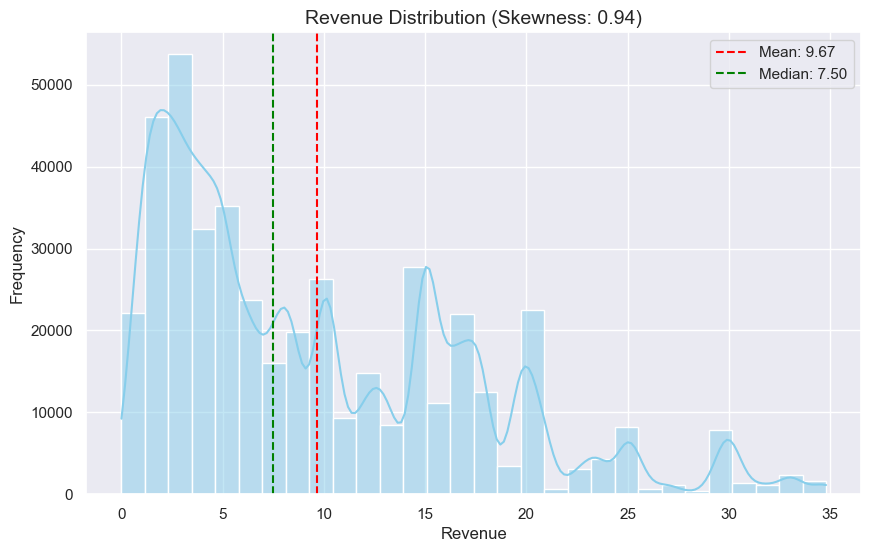

In [64]:
from scipy.stats import skew

# Calculate skewness
revenue_skewness = skew(data_cleaned["Revenue"])

# Mean and median of the cleaned data
mean = data_cleaned["Revenue"].mean()
median = data_cleaned["Revenue"].median()

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["Revenue"], kde=True, color='skyblue', bins=30)

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')


plt.title(f"Revenue Distribution (Skewness: {revenue_skewness:.2f})", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend()

# Display the plot
plt.show()

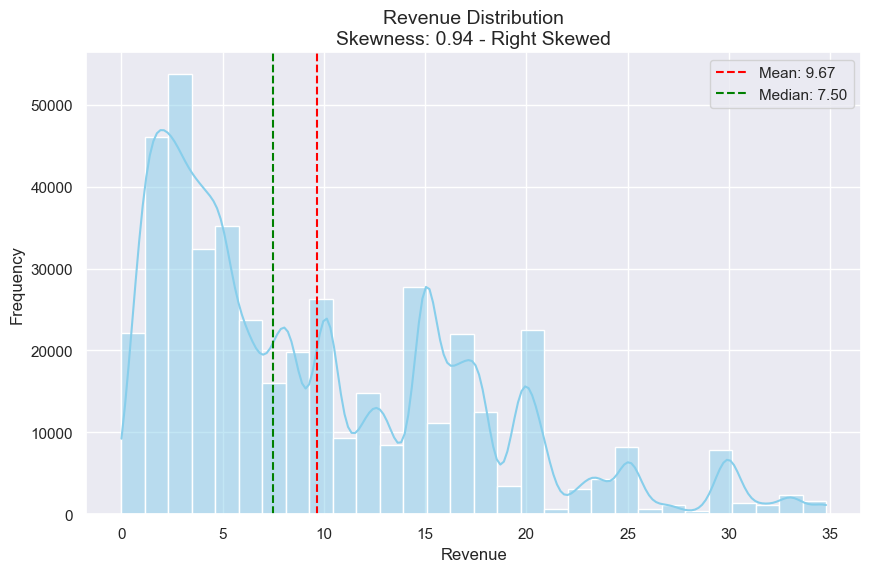

In [65]:
from scipy.stats import skew

# Calculate skewness
revenue_skewness = skew(data_cleaned["Revenue"])

# Mean and median of the cleaned data
mean = data_cleaned["Revenue"].mean()
median = data_cleaned["Revenue"].median()

# Determine skewness direction based on mean and median
if mean > median:
    skew_type = "Right Skewed"
elif mean < median:
    skew_type = "Left Skewed"
else:
    skew_type = "Symmetric (Normal Distribution)"

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["Revenue"], kde=True, color='skyblue', bins=30)

# Add vertical lines for mean and median
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')

# Title and labels
plt.title(f"Revenue Distribution\nSkewness: {revenue_skewness:.2f} - {skew_type}", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.show()


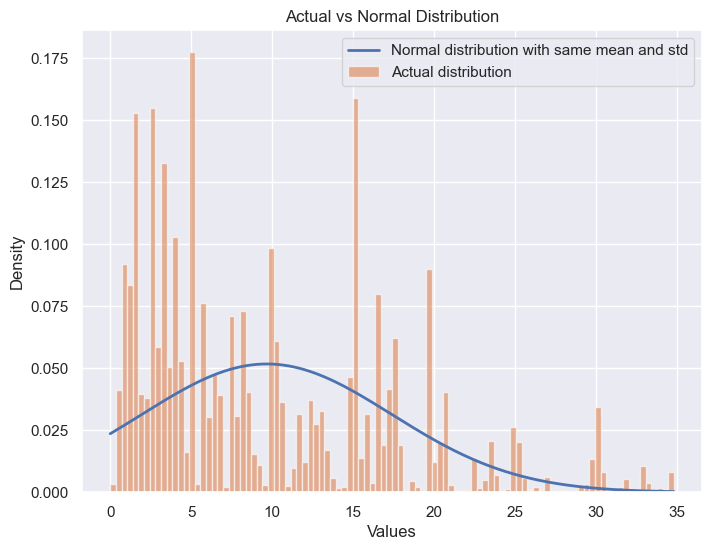

In [66]:
h = np.asarray(data_cleaned['Revenue']) 
h = sorted(h)

mean = np.mean(h)
std = np.std(h)

# Fit normal distribution
fit = stats.norm.pdf(h, mean, std)

# Plot actual data and fitted normal distribution
plt.figure(figsize=(8, 6))
plt.plot(h, fit, '-', linewidth=2, label="Normal distribution with same mean and std")
plt.hist(h, density=True, bins=100, alpha=0.6, label="Actual distribution")  # Use density=True
plt.title("Actual vs Normal Distribution")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()


It is done to Normal distribution a little bit

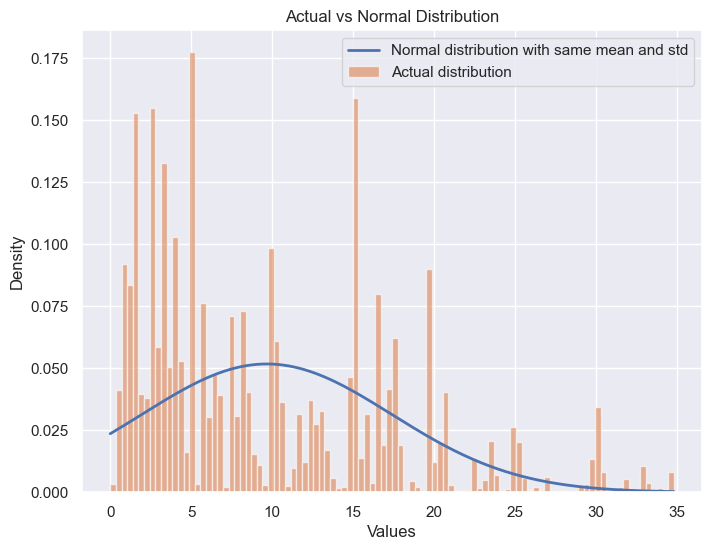

Skewness: 0.94
Mean: 9.67
Median: 7.50
The distribution is right-skewed (positive skewness).
Mean is greater than Median, indicating a right-skewed distribution.


In [67]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import skew

h = np.asarray(data_cleaned['Revenue']) 
h = sorted(h)

# Calculate mean, std and skewness for fitting normal distribution
mean = np.mean(h)
std = np.std(h)
revenue_skewness = skew(h)

# Fit normal distribution
fit = stats.norm.pdf(h, mean, std)

# Plot actual data and fitted normal distribution
plt.figure(figsize=(8, 6))
plt.plot(h, fit, '-', linewidth=2, label="Normal distribution with same mean and std")
plt.hist(h, density=True, bins=100, alpha=0.6, label="Actual distribution")  # Use density=True
plt.title("Actual vs Normal Distribution")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

print(f"Skewness: {revenue_skewness:.2f}")
print(f"Mean: {mean:.2f}")
print(f"Median: {np.median(h):.2f}")

# Check if the distribution is approximately normal
if np.abs(revenue_skewness) < 0.5:
    print("The distribution is approximately normal (skewness is close to 0).")
elif revenue_skewness > 0:
    print("The distribution is right-skewed (positive skewness).")
else:
    print("The distribution is left-skewed (negative skewness).")

if mean == np.median(h):
    print("Mean and Median are approximately equal, indicating a symmetric distribution.")
elif mean > np.median(h):
    print("Mean is greater than Median, indicating a right-skewed distribution.")
else:
    print("Mean is less than Median, indicating a left-skewed distribution.")


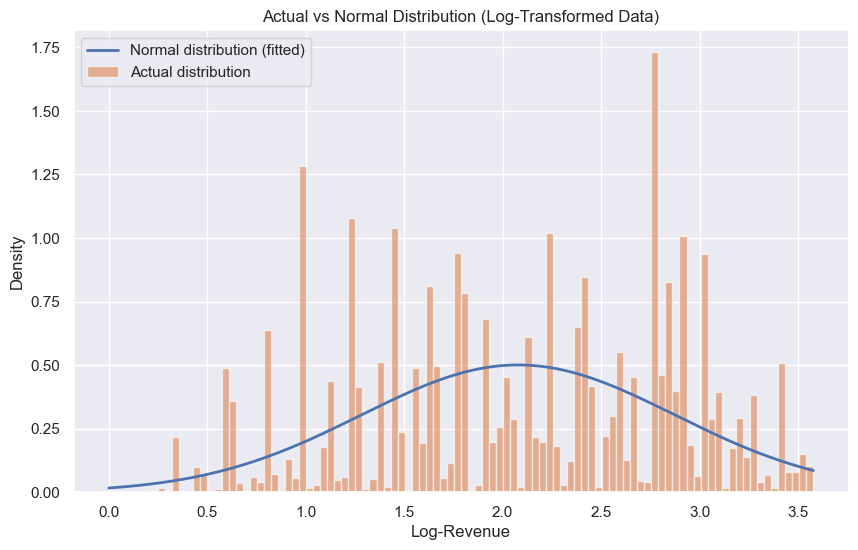

In [68]:
data_cleaned['Revenue_log'] = np.log1p(data_cleaned['Revenue'])  # Log transformation

h = np.asarray(data_cleaned['Revenue_log']) 

if len(h) > 1_000_000:  # Threshold for sampling
    h = np.random.choice(h, size=1_000_000, replace=False)

# Calculate mean and std for fitting normal distribution
mean = np.mean(h)
std = np.std(h)

x = np.linspace(min(h), max(h), 1000)  
fit = stats.norm.pdf(x, mean, std)  

# Plot actual data and fitted normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, fit, '-', linewidth=2, label="Normal distribution (fitted)")
plt.hist(h, density=True, bins=100, alpha=0.6, label="Actual distribution") 
plt.title("Actual vs Normal Distribution (Log-Transformed Data)")
plt.xlabel("Log-Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()



###
if skewness < -0.5:)<br>
    print("The data is left-skewed.")<br>
elif skewness > 0.5:)<br>
    print("The data is right-skewed."))<br>
else:)<br>
    print("The data is approximately symmetric."))<br>

In [69]:
country_avg = data_cleaned.groupby('Country').agg({'Revenue':['mean', 'std', 'var']}).reset_index()
country_avg = country_avg.sort_values(('Revenue', 'mean'), ascending=False).reset_index(drop=True)
country_avg.head(10)

Country    Revenue                     
                              mean       std        var
0               Bahrain  20.870000  5.527115  30.549000
1             Lithuania  19.770000  5.137022  26.389000
2  United Arab Emirates  19.267407  8.023485  64.376306
3                Brazil  18.924545  3.740687  13.992740
4        Czech Republic  18.720000  5.736515  32.907600
5               Lebanon  18.492609  6.033730  36.405893
6             Hong Kong  18.279882  7.106488  50.502179
7             Singapore  18.074141  7.414415  54.973545
8    European Community  18.016304  5.372399  28.862673
9                 Italy  17.674746  6.012726  36.152877

In [70]:
data_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Year', 'Month', 'Week', 'DayOfWeek', 'Hour',
       'Revenue', 'Revenue_log'],
      dtype='object')

In [71]:
data_cleaned.select_dtypes(include=['number']).skew()

Quantity       1.663189
UnitPrice      1.246151
Year          -3.221606
Month         -0.239065
Week          -0.216141
DayOfWeek      0.241825
Hour          -0.014862
Revenue        0.942179
Revenue_log   -0.198398
dtype: float64

### Correlation HeatMap Matrix

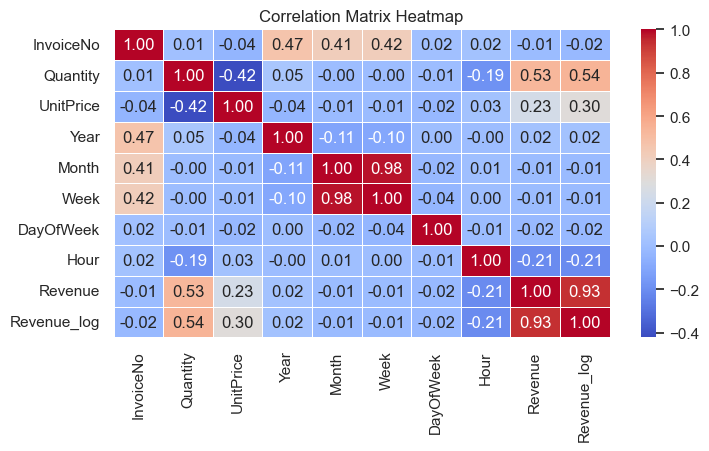

In [70]:
# Select only the numeric columns for correlation calculation
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### INSIGHTS
1) Apart from same rows and columns Revenue and  Quantity has high correlation. Means when the Quantity Increases, Revenue also Increases<br>
2) Revenue and Revenue_log are highly correlated bcoz it comes from Revenue<br>
3) Revenue is slightly related with Unitprice by 0.14 mean if the Unitprice Increases Revenue also Increase<br>
4) When the hour increases from day to night the sales decreases. People like to buy our products in daytime
5) When the Unit price Increases ,the quantity to buy the product decreases(Facts). So thats why it is in negative<br>


In [73]:
correlation_matrix

,Quantity,UnitPrice,Year,Month,DayOfWeek,Hour,Revenue,Revenue_log
Quantity,1.000000,-0.422408,0.048503,-0.003372,-0.005025,-0.188124,0.530820,0.541715
UnitPrice,-0.422408,1.000000,-0.035671,-0.011803,-0.023770,0.026510,0.234975,0.303146
Year,0.048503,-0.035671,1.000000,-0.113119,0.002095,-0.001289,0.023807,0.022739
Month,-0.003372,-0.011803,-0.113119,1.000000,-0.023715,0.005978,-0.007459,-0.011986
DayOfWeek,-0.005025,-0.023770,0.002095,-0.023715,1.000000,-0.008511,-0.018419,-0.018715
Hour,-0.188124,0.026510,-0.001289,0.005978,-0.008511,1.000000,-0.207447,-0.209561
Revenue,0.530820,0.234975,0.023807,-0.007459,-0.018419,-0.207447,1.000000,0.933557
Revenue_log,0.541715,0.303146,0.022739,-0.011986,-0.018715,-0.209561,0.933557,1.000000


In [74]:
skewness = data_cleaned['Revenue'].skew()
print("Skewness of revenue column:",skewness)

Skewness of revenue column: 0.9421790525392618


In [75]:
total_revenue_per_product = data_cleaned.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False)

In [76]:
total_quantity_per_product = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

In [77]:
revenue_per_country = data_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

In [78]:
top_selling_products = total_quantity_per_product.head(10)
top_selling_products

StockCode
21212     16026
84879     10815
22197     10544
20725     10118
85099B     9720
22961      9465
21977      9040
84991      8901
23209      8386
22178      7857
Name: Quantity, dtype: int64

In [79]:
top_revenue_products = total_revenue_per_product.head(10)

In [80]:
top_revenue_Countries = revenue_per_country.head(10)

In [129]:
top_revenue_Countries.to_csv('F:\\New folder\\top.csv')

In [81]:
# Convert Series to DataFrame for better handling in the plot
top_selling_df = top_selling_products.reset_index()
top_selling_df.columns = ['StockCode', 'Quantity']



In [82]:
top_selling_df

,StockCode,Quantity
0,21212,16026
1,84879,10815
2,22197,10544
3,20725,10118
4,85099B,9720
5,22961,9465
6,21977,9040
7,84991,8901
8,23209,8386
9,22178,7857


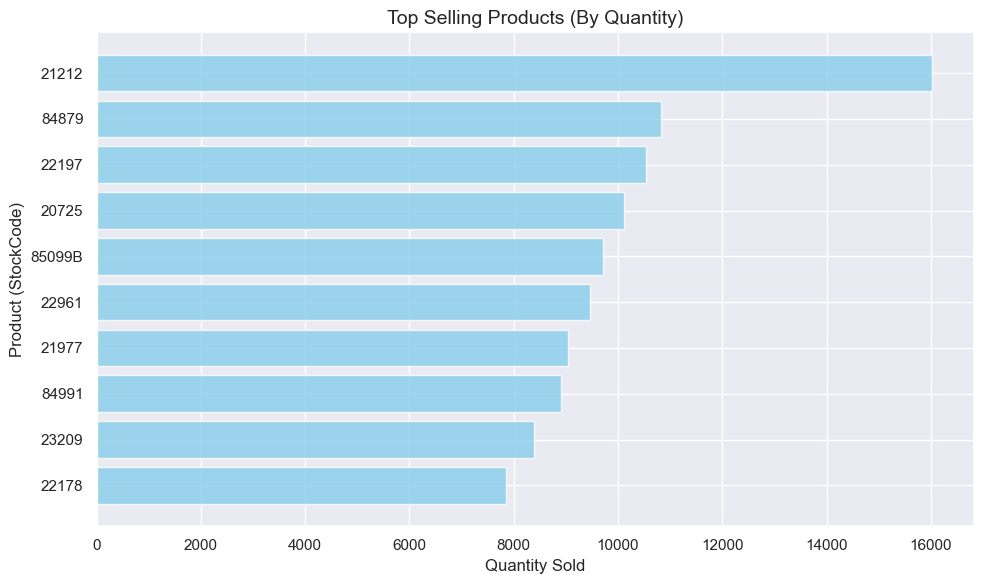

In [83]:
# Extract data for plotting (already sorted in descending order)
stock_codes = top_selling_products.index
quantities = top_selling_products.values

# Reverse the order for a descending bar plot
stock_codes = stock_codes[::-1]
quantities = quantities[::-1]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(stock_codes, quantities, color='skyblue', alpha=0.8)

# Add titles and labels
plt.title("Top Selling Products (By Quantity)", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product (StockCode)", fontsize=12)

# Optimize layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


### Insights
The product that is highly solded is 21212.<br>
The productin 10th position which is highly solded is 22178.<br>
### Recommendation
If we Increase the Unitprice of that product 21212 a little bit we can make more revenue whic is correlated<br>

In [84]:
data_cleaned['Quantity'].max()

26

In [85]:
# Filter data for top revenue-generating products
top_products_data = data_cleaned[data_cleaned['StockCode'].isin(top_revenue_products.index)]
top_products_data['StockCode'].count()

11438

In [86]:
# Calculate total revenue per year
revenue_per_year = (
    data_cleaned.groupby('Year')['Revenue']
    .sum()  # Sum the revenue for each year
    .sort_values(ascending=False)  # Sort by total revenue, descending
)

# Display top revenue-generating years
print(revenue_per_year.head())


Year
2011    3953124.904
2010     298417.340
Name: Revenue, dtype: float64


### Mulvariate Analysis

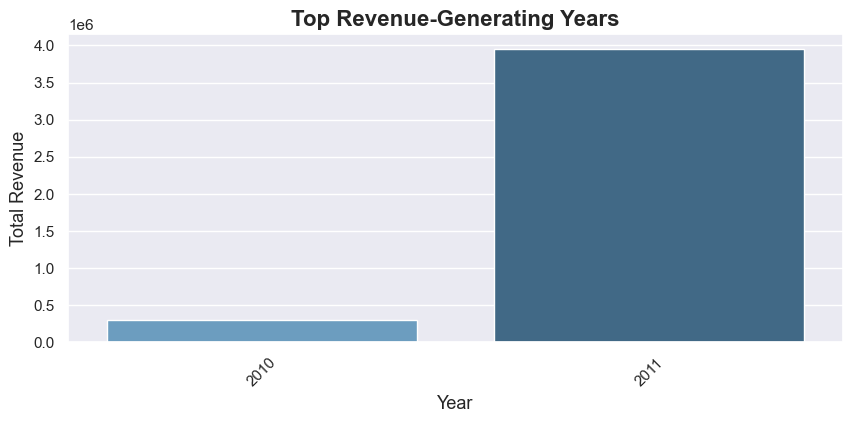

In [87]:
# Create a bar plot
plt.figure(figsize=(10, 4))  # Set the figure size
sns.barplot(x=revenue_per_year.head().index, y=revenue_per_year.head().values, palette="Blues_d")
plt.title("Top Revenue-Generating Years", fontsize = 16 , fontweight= 'bold')
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Total Revenue", fontsize = 13)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()



### Insights
The Revenue for 2011 is very high compared to 2010

### Research
In 2010, global trade was recovering from the aftermath of the Great Recession. Despite a record surge in export volumes that year, growth rates began to stabilize in 2011, marking a shift to more modest expansions

In [88]:
# Calculate total revenue per month
revenue_per_month = (
    data_cleaned.groupby('Month')['Revenue']
    .sum()  # Sum the revenue for each month
    .reset_index()
)

In [89]:
# Define a mapping from month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

month_mapping.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [90]:
# Add a 'MonthName' column based on the 'Month' column
revenue_per_month['MonthName'] = revenue_per_month['Month'].map(month_mapping)

In [91]:
# Sort the months by numeric order (1 to 12)
revenue_per_month_sorted = revenue_per_month.sort_values('Month').reset_index(drop=True)

# Display the result
print(revenue_per_month_sorted[['MonthName', 'Revenue']])

    MonthName     Revenue
0     January  303011.790
1    February  273942.450
2       March  300514.290
3       April  291526.161
4         May  343216.280
5        June  351316.170
6        July  366561.951
7      August  360530.100
8   September  438474.832
9     October  448624.790
10   November  550300.800
11   December  223522.630


In [92]:
# Display top revenue-generating years
print(revenue_per_month_sorted.head(12))

    Month     Revenue  MonthName
0       1  303011.790    January
1       2  273942.450   February
2       3  300514.290      March
3       4  291526.161      April
4       5  343216.280        May
5       6  351316.170       June
6       7  366561.951       July
7       8  360530.100     August
8       9  438474.832  September
9      10  448624.790    October
10     11  550300.800   November
11     12  223522.630   December


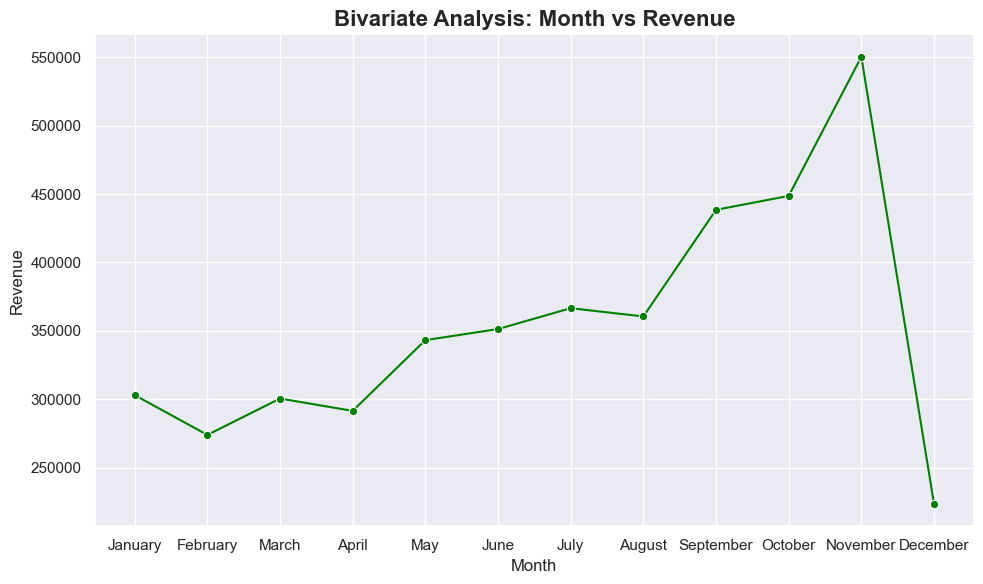

In [93]:
# Bivariate Analysis: Year vs Revenue (Line plot)
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_per_month_sorted.reset_index(), x='MonthName', y='Revenue', marker='o', color='green')

# Add labels and title
plt.title('Bivariate Analysis: Month vs Revenue', fontsize = 16 , fontweight= 'bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

### Insights
1) The products sales revenue is very High in November.<br>
2) More precisely it starts Increasing from september to November.<br>

### Recommendations
1) Use the lineplot for all years to see the trends and get the good understanding<br>
2) By just looking at it we cant say for sure this months will definitely have more revenue because it is total for all years<br>
3) This Dataset has only 2 years (2010 and 2011). If we have more years we can analyze all years and month and say which months we will have more revenue<br>

In [94]:
# Calculate total revenue per month
revenue_per_month = (
    data_cleaned.groupby(['Year', 'Month'])['Revenue']  # Group by both Year and Month
    .sum()  # Sum the revenue for each month
    .reset_index()
) 
revenue_per_month

,Year,Month,Revenue
0,2010,1,21963.340
1,2010,2,19379.540
2,2010,3,14521.420
3,2010,5,17331.770
4,2010,6,25213.180
5,2010,7,19473.500
6,2010,8,20202.920
7,2010,9,20131.650
8,2010,10,18240.530
9,2010,12,121959.490


In [95]:
revenue_per_month['MonthName'] = revenue_per_month['Month'].map(month_mapping)
revenue_per_month

,Year,Month,Revenue,MonthName
0,2010,1,21963.340,January
1,2010,2,19379.540,February
2,2010,3,14521.420,March
3,2010,5,17331.770,May
4,2010,6,25213.180,June
5,2010,7,19473.500,July
6,2010,8,20202.920,August
7,2010,9,20131.650,September
8,2010,10,18240.530,October
9,2010,12,121959.490,December


In [96]:
data_cleaned.describe()

,Quantity,UnitPrice,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
count,439810.000000,439810.000000,439810.000000,439810.000000,439810.0,439810.000000,439810.000000,439810.000000,439810.000000
mean,5.755997,2.526517,2010.924797,6.925938,28.194454,2.709634,13.146747,9.666770,2.079152
std,6.075701,1.899870,0.263719,3.362116,14.723973,1.951123,2.423043,7.717808,0.796738
min,1.000000,0.001000,2010.000000,1.000000,1.0,0.000000,6.000000,0.001000,0.001000
25%,1.000000,1.250000,2011.000000,4.000000,16.0,1.000000,11.000000,3.290000,1.456287
50%,3.000000,1.950000,2011.000000,7.000000,29.0,3.000000,13.000000,7.500000,2.140066
75%,9.000000,3.750000,2011.000000,10.000000,42.0,4.000000,15.000000,15.000000,2.772589
max,26.000000,8.330000,2011.000000,12.000000,52.0,6.000000,20.000000,34.800000,3.577948


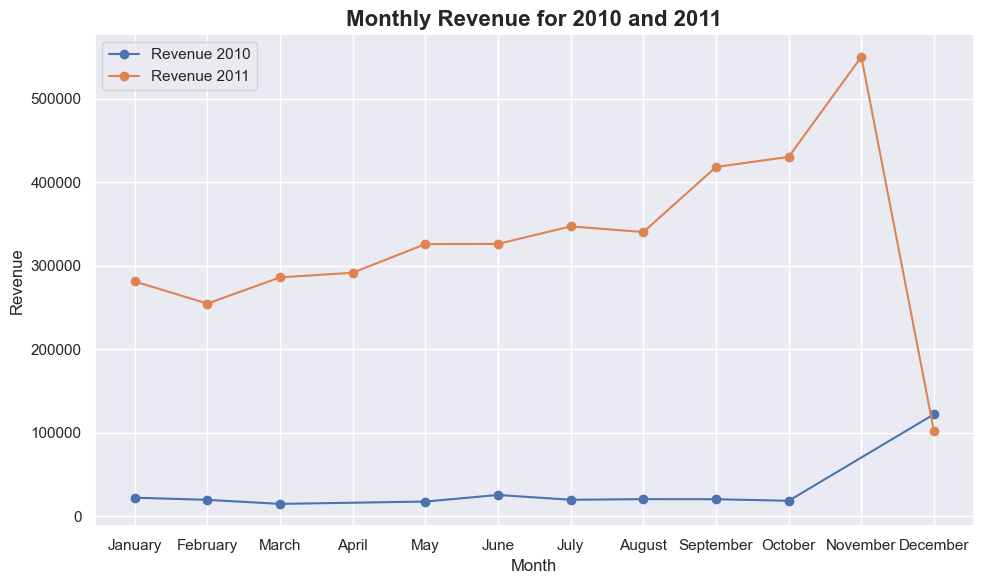

In [97]:

# Sort the months by numeric order (1 to 12) and reset the index
revenue_per_month_sorted = revenue_per_month.sort_values(['Year', 'Month']).reset_index(drop=True)

# Plot revenue for each year
plt.figure(figsize=(10, 6))

# Plot data for each year separately
for year in revenue_per_month_sorted['Year'].unique():
    data = revenue_per_month_sorted[revenue_per_month_sorted['Year'] == year]
    plt.plot(data['Month'], data['Revenue'], marker='o', label=f'Revenue {year}')

# Add labels and title
plt.title('Monthly Revenue for 2010 and 2011', fontsize = 16 , fontweight= 'bold')
plt.xlabel('Month')
plt.ylabel('Revenue')

# Set x-axis labels to be the month names
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Add a legend
plt.legend()
plt.tight_layout()
# Show the plot with grid
plt.grid(True)
plt.show()


### Insights
1) The products sales revenue is very High in November for 2011. But in 2010 there is not much change. With this we can tell November sales is more.<br>
2) More precisely it starts Increasing from september to November.<br>
3) At the end of 2010 we can see the spike which means the sales for 2010 is stabilized after great recession (Mentioned in Research part of High Revenue Years)  

### Research 
Black Friday: November features Black Friday, the busiest shopping day in the US, and Cyber Monday, highly profitable days for retailers globally

In [98]:
print("Top-Selling Products by Quantity:\n", top_selling_products)
print("Top Revenue-Generating Products:\n", top_revenue_products)
print("Revenue Contribution by Country:\n", top_revenue_Countries)

Top-Selling Products by Quantity:
 StockCode
21212     16026
84879     10815
22197     10544
20725     10118
85099B     9720
22961      9465
21977      9040
84991      8901
23209      8386
22178      7857
Name: Quantity, dtype: int64
Top Revenue-Generating Products:
 StockCode
85099B    22261.31
85123A    20225.91
84879     18633.83
20725     17863.63
22960     16059.90
47566     15643.89
22720     15491.67
22961     15170.97
23203     14536.09
23298     14518.35
Name: Revenue, dtype: float64
Revenue Contribution by Country:
 Country
United Kingdom    3747380.014
Germany            110696.320
France             103049.260
EIRE                92799.350
Spain               27793.450
Belgium             26033.830
Switzerland         23055.110
Portugal            17340.020
Norway              11417.450
Italy               10428.100
Name: Revenue, dtype: float64


### Multivariate Analysis


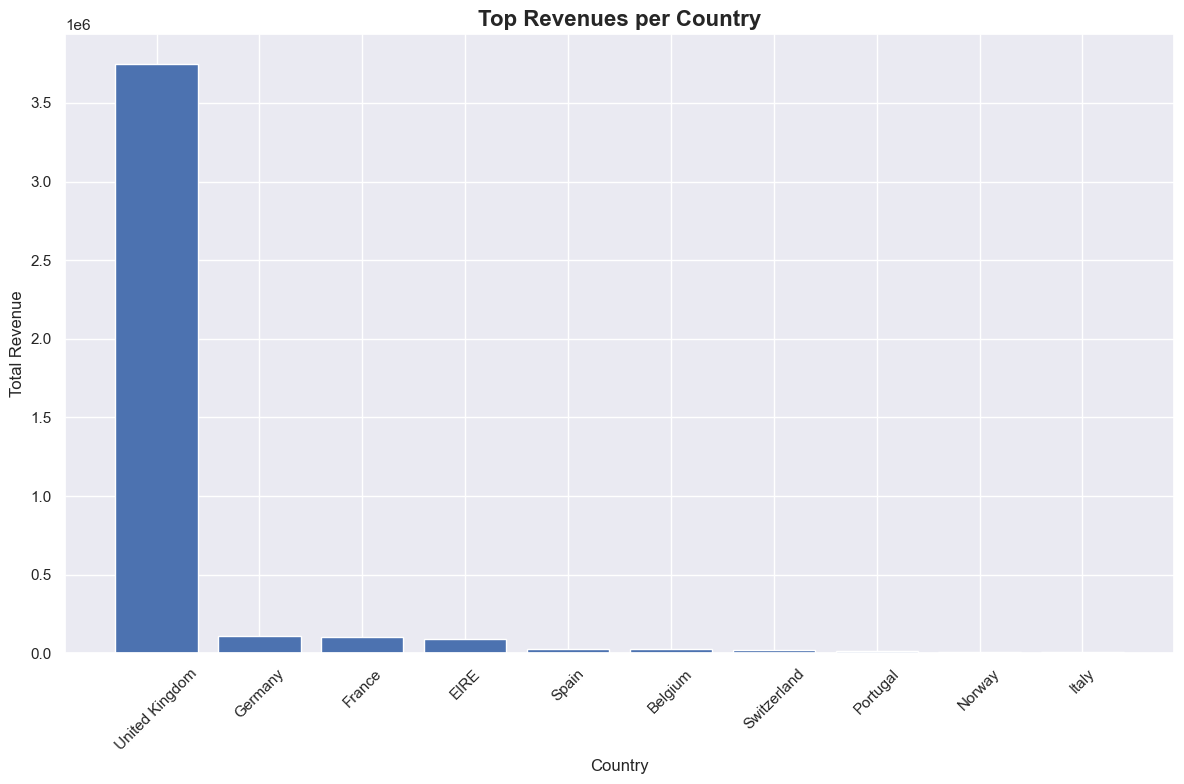

In [99]:
plt.figure(figsize=(12, 8))
plt.bar(top_revenue_Countries.index, top_revenue_Countries.values)
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top Revenues per Country',fontsize = 16, fontweight = 'bold')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

### Insights
1) The Barplot displays the top 10 countries which generates more revenue in 2010 and 2011.<br>
2) United kingdom generated the highest Revenue of Rs.3747380.014  than other Countries in these past 2 years.<br>
3) Italy is in 10th postion at Generating Revenue.<br>

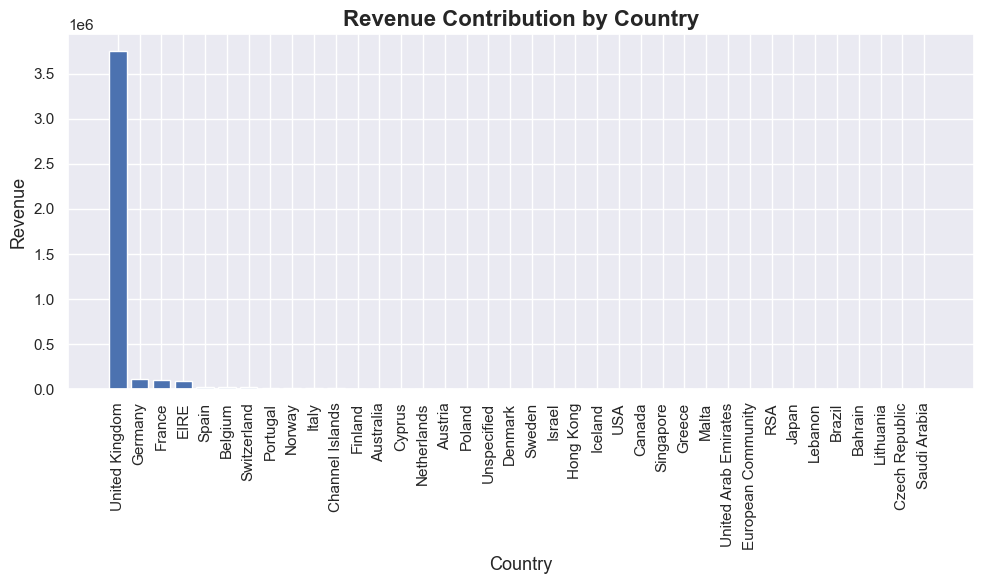

In [100]:
# Create the bar plot
plt.figure(figsize=(10, 6)) 
plt.bar(revenue_per_country.index, revenue_per_country.values)

# Adding labels and title
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)
plt.title('Revenue Contribution by Country',fontsize = 16, fontweight = 'bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjusts the plot to fit labels properly
plt.show()

### Univariate Analysis

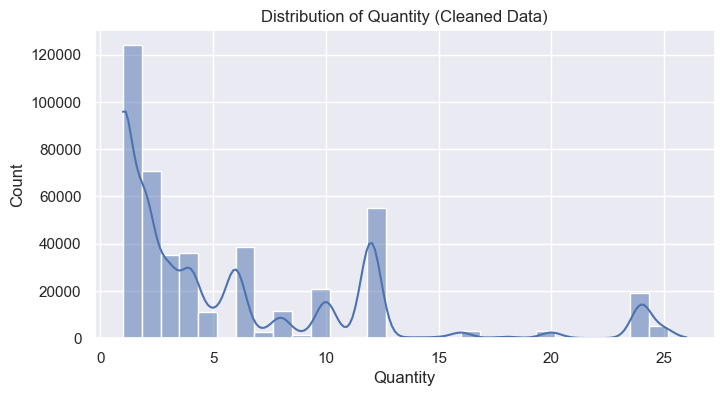

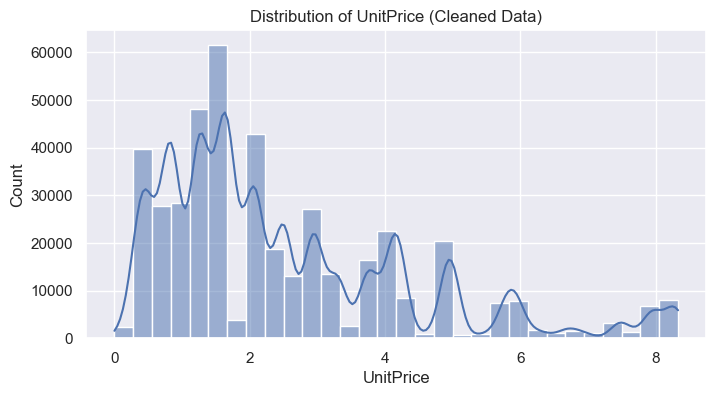

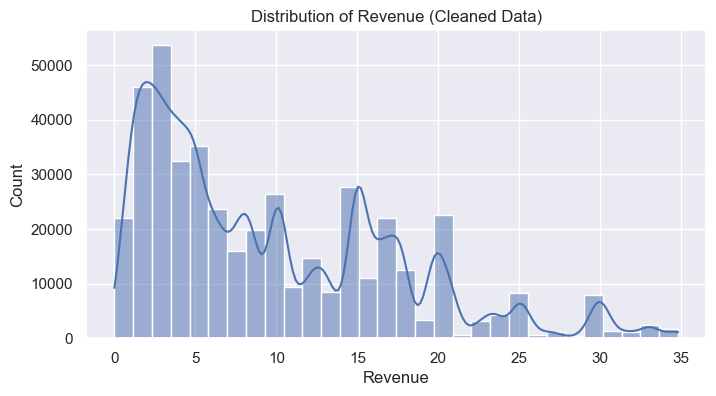

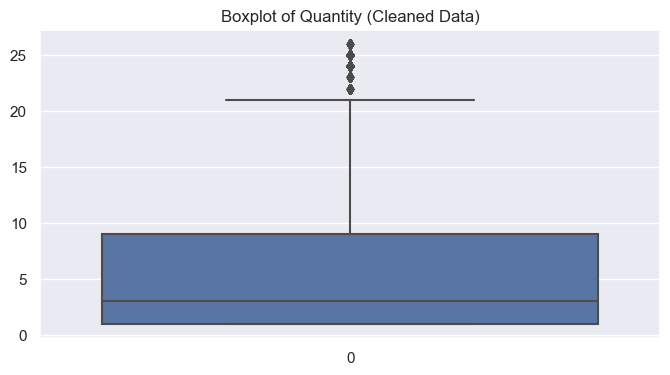

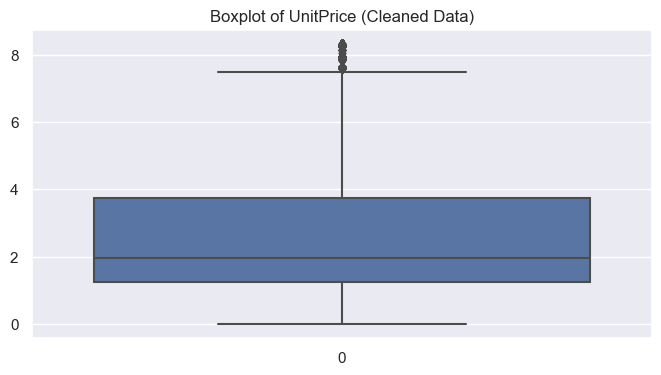

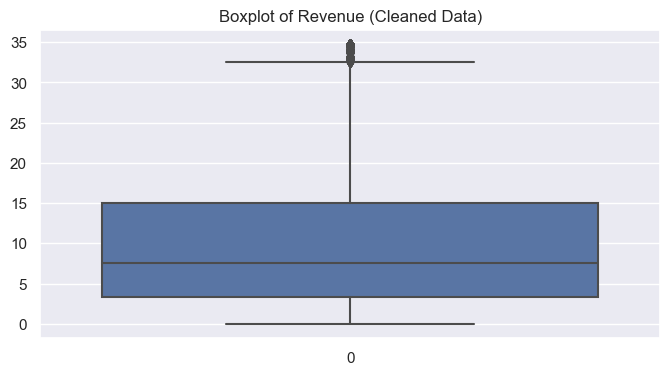

In [101]:
# List of numerical columns for analysis
numerical_cols = ['Quantity', 'UnitPrice', 'Revenue']

# Plot histograms for numerical columns in cleaned data
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[col], bins=30, kde=True)
    plt.title(f'Distribution of {col} (Cleaned Data)')
    plt.show()

# Plot box plots for numerical columns in cleaned data
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_cleaned[col])
    plt.title(f'Boxplot of {col} (Cleaned Data)')
    plt.show()


#### Insights:
1) Top Sellers: The top 20 StockCodes drive most sales, indicating core revenue contributors.<br>
2) Revenue Distribution: Most transactions are small to medium-sized, with a few high-value outliers from bulk or premium purchases.<br>
3) Pricing Trends: A mix of low-priced and premium items shows diverse customer purchasing behavior.<br>
4) Outliers: High Quantity and Amount outliers indicate potential bulk buyers or high-margin opportunities.<br>
### Recommendations

1) Stock Optimization: Focus inventory and promotions on top-performing StockCodes.<br>
2) Customer Retention: Incentivize high-value customers with loyalty programs or discounts.<br>
3) Pricing Strategy: Bundle low-margin items and use premium pricing for high-demand products.<br>
4) Upselling: Encourage larger purchases from small-value customers with cross-sell offers.<br>
5) Inventory Management: Reduce slow-moving items to optimize stock and profitability.<br>


### Bivariate Analysis

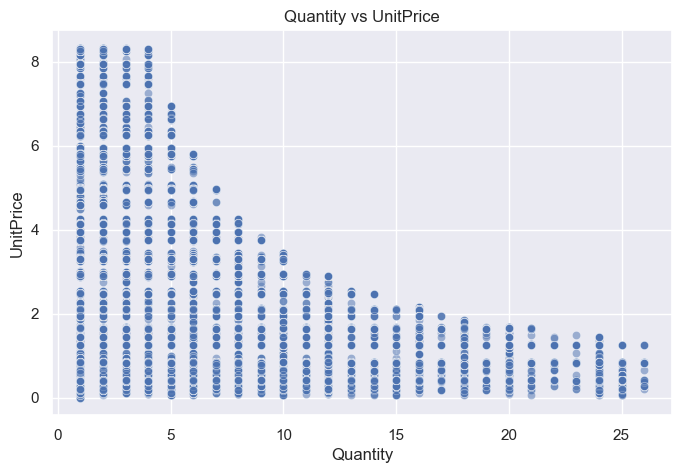

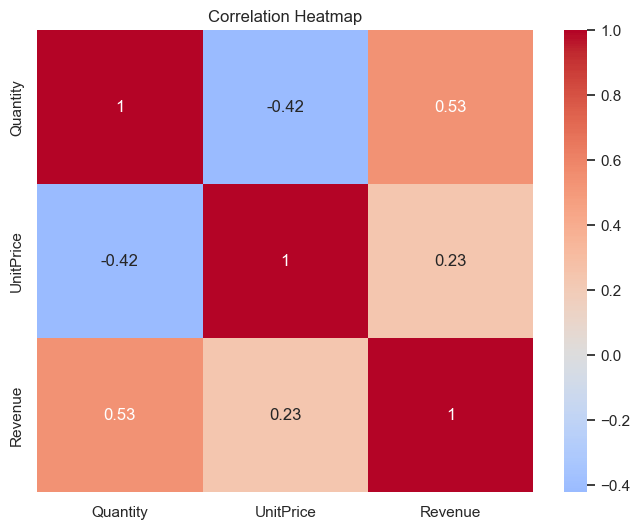

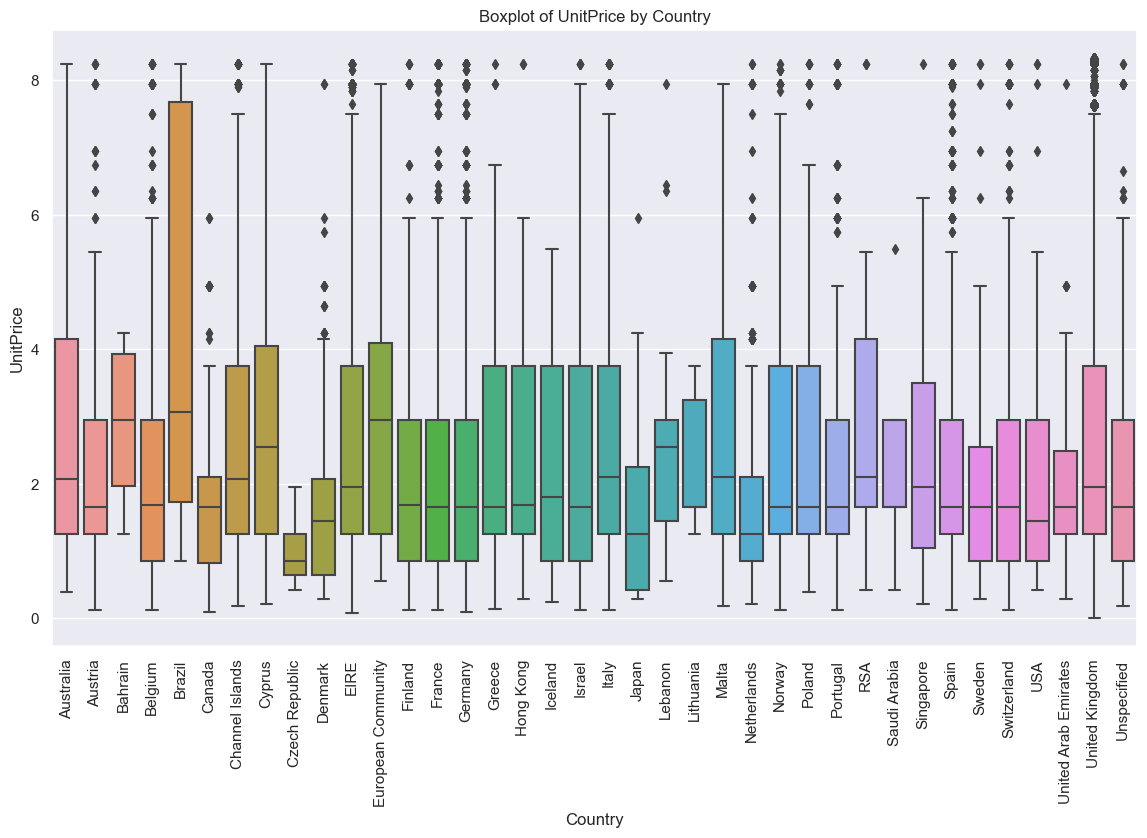

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


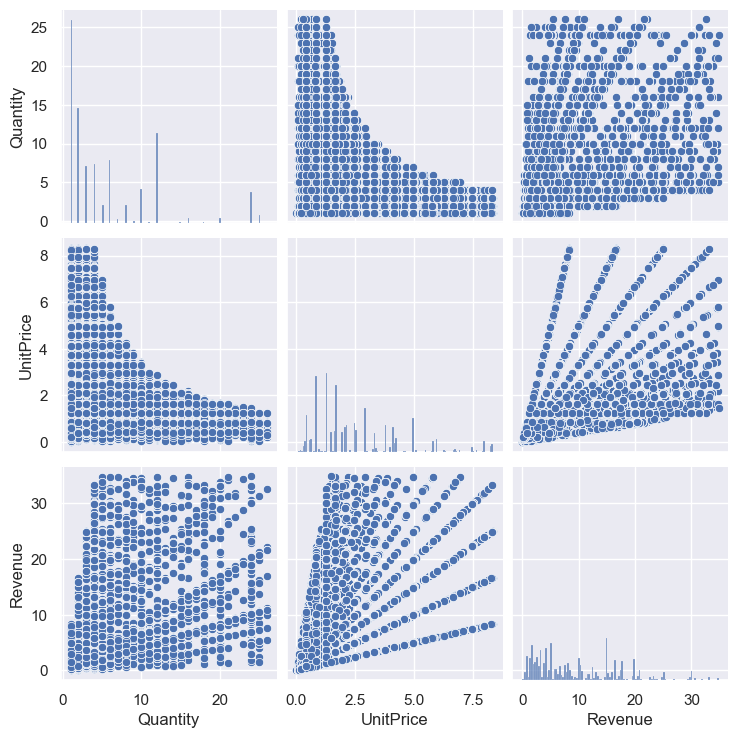

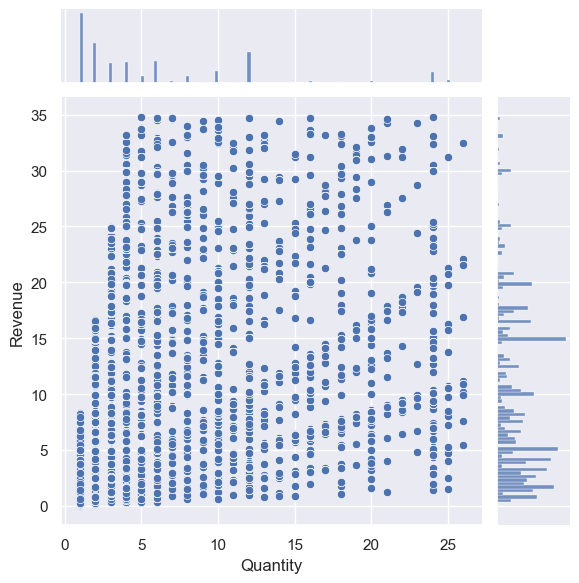

In [102]:
# Bivariate Analysis

# Scatter plot for Quantity vs UnitPrice
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data_cleaned, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Quantity vs UnitPrice')
plt.show()

# Correlation heatmap for numerical features
numerical_cols = ['Quantity', 'UnitPrice', 'Revenue']
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Box plot of UnitPrice for each Country
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned, x='Country', y='UnitPrice')
plt.title('Boxplot of UnitPrice by Country')
plt.xticks(rotation=90)
plt.show()

# Pair plot for numerical columns
sns.pairplot(data_cleaned[numerical_cols])
plt.show()

# Joint plot for Quantity vs Revenue
sns.jointplot(data=data_cleaned, x='Quantity', y='Revenue', kind="scatter")
plt.show()


### Insights
1) Bulk discounts drive higher sales volume (Quantity vs. UnitPrice).
2) Strong Quantity-Amount correlation confirms revenue depends on volume.
3) Pricing varies by country, with outliers indicating premium opportunities.
4) Most transactions cluster around small-to-moderate quantities and revenue.
### Recommendations
1) Offer targeted bulk purchase discounts.
2) Optimize pricing for different regions.
3) Focus on high-value customers for loyalty rewards.
4) Stock popular products based on sales clusters.

### Multivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


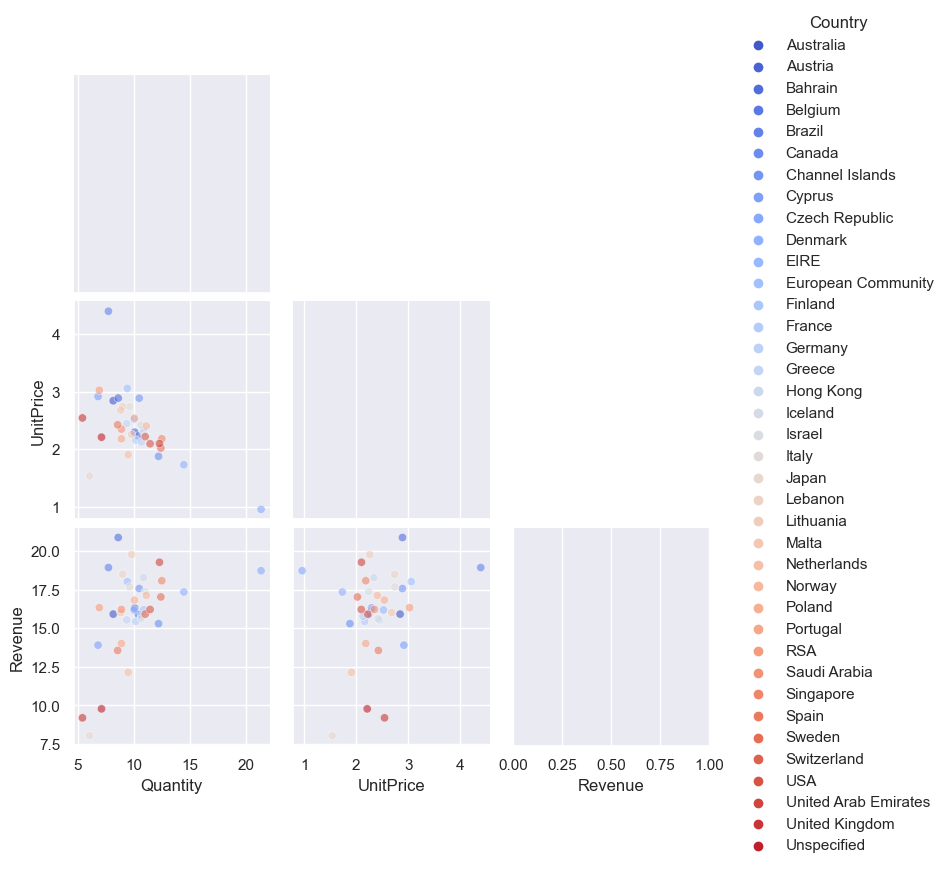

In [103]:
# Group the data by 'Country' and aggregate using the mean for numerical columns
data_grouped = data_cleaned.groupby('Country').agg({'Quantity': 'mean', 
                                                    'UnitPrice': 'mean', 
                                                    'Revenue': 'mean'}).reset_index()

# Pair plot with 'Country' as hue
sns.pairplot(data_grouped, hue='Country', palette='coolwarm', corner=True, diag_kind="kde", plot_kws={"alpha": 0.6})
plt.show()


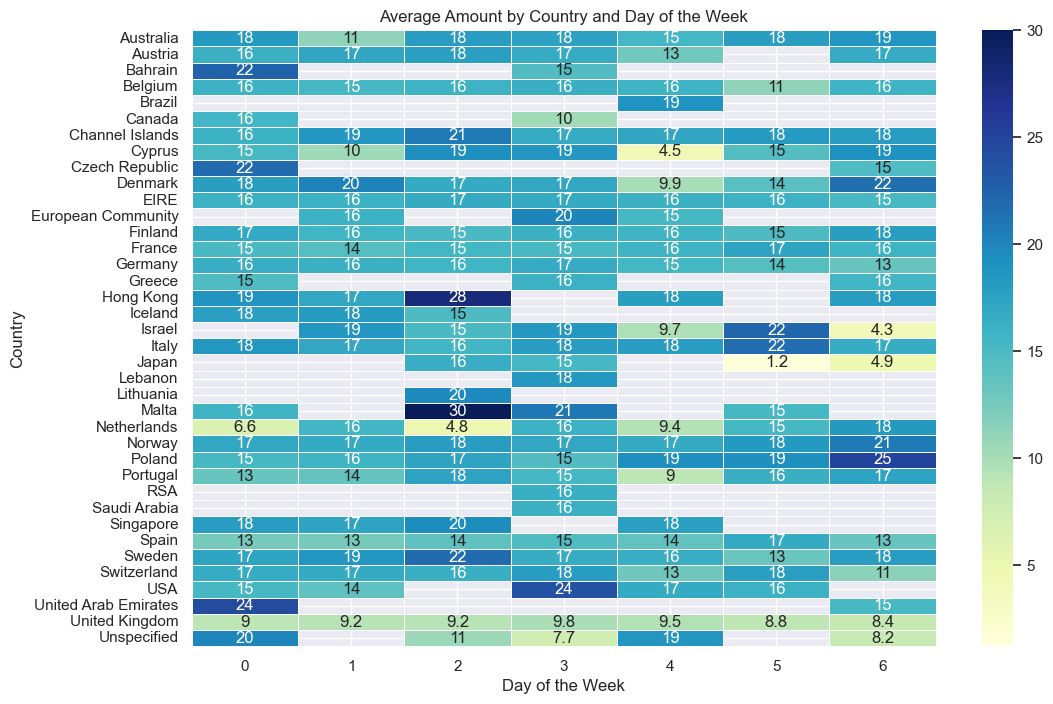

In [104]:
# Extract day of the week from 'InvoiceDate' (0 = Monday, 6 = Sunday)
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek

# Group the data by 'Country' and 'DayOfWeek', then calculate the mean 'Amount'
grouped_data = data_cleaned.groupby(['Country', 'DayOfWeek'], observed=False)['Revenue'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped_data.pivot_table(values='Revenue', index='Country', columns='DayOfWeek', aggfunc='mean', observed=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Amount by Country and Day of the Week')
plt.ylabel('Country')
plt.xlabel('Day of the Week')
plt.show()


### Insights
1) Pair Plot (Hue: Country): Shows country-specific purchasing patterns and relationships between variables. Some countries have distinct buying behaviors, while others overlap.
2) Heatmap (Average Amount by Country and Day): Reveals spending trends by day and region, with certain countries showing peak activity on specific weekdays.
### Recommendations
1) Tailor Marketing: Customize campaigns based on country-specific patterns.
2) Target High-Revenue Days: Focus promotions on days with high average spending in each region.
3) Personalize Offers: Segment customers by their regional and weekly purchasing behaviors for targeted deals.
4) Stock Management: Align inventory with demand peaks in each country and day.

In [2]:
## data_cleaned.to_csv('F:\\New folder\\AI.csv', index=False)

In [2]:
data_cleaned = pd.read_csv('F:\\New folder\\AI.csv')
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,2010,1,2,1,8,15.30,2.791165
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,2010,1,2,1,8,22.00,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583


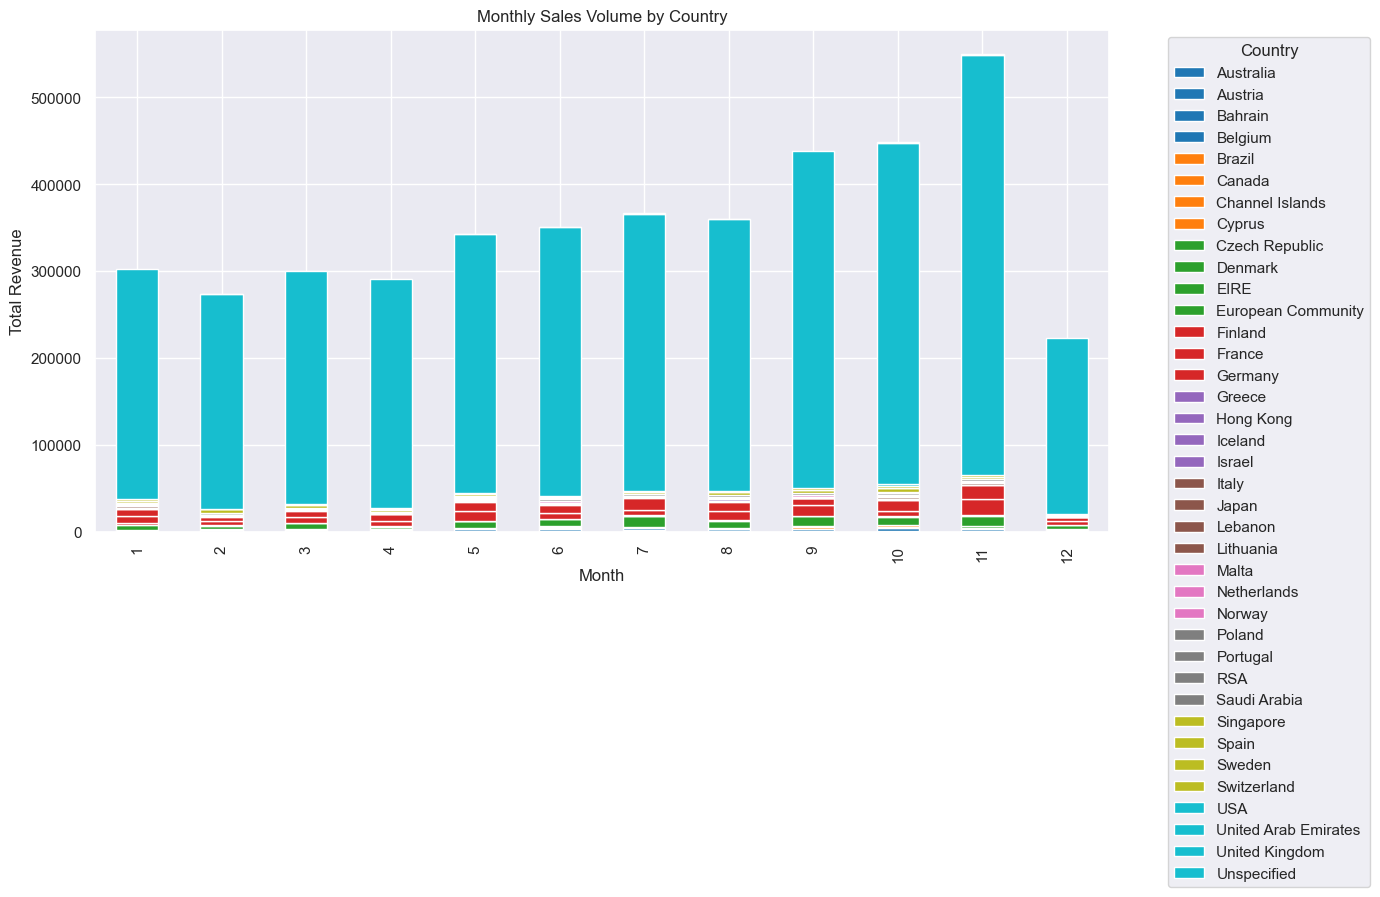

In [3]:
# Grouped data for plotting
monthly_sales = data_cleaned.groupby(['Country', 'Month'])['Revenue'].sum().unstack()

# Plot grouped bar chart
monthly_sales.T.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='tab10')
plt.title('Monthly Sales Volume by Country')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insights:
1) Seasonality: Sales peak in certain months for specific countries.<br>
2) Market Strength: Some countries consistently outperform others.<br>
### Recommendations:
1) Target Peak Months for marketing.<br>
2) Boost Sales in underperforming countries with tailored strategies.<br>

### KNN (K- Nearest Neighbours)

### Label Encoding

In [4]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to StockCode, InvoiceNo and Country in data_cleaned
data_cleaned['StockCode'] = label_encoder.fit_transform(data_cleaned['StockCode'])
data_cleaned['Country'] = label_encoder.fit_transform(data_cleaned['Country'])
data_cleaned['InvoiceNo'] = label_encoder.fit_transform(data_cleaned['InvoiceNo'])



In [5]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
0,0,3210,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,36,2010,1,2,1,8,15.30,2.791165
1,0,2571,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,36,2010,1,2,1,8,20.34,3.060583
2,0,2786,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,36,2010,1,2,1,8,22.00,3.135494
3,0,2735,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,36,2010,1,2,1,8,20.34,3.060583
4,0,2734,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,36,2010,1,2,1,8,20.34,3.060583


#### Note:
The Categorical columns StockCode and Countries were Labelled with Integer Values

### Removing Unwanwanted Columns for KNN

In [6]:
data_cleaned_knn = data_cleaned.drop(['Description', 'InvoiceDate','Revenue_log'], axis=1)

### Selecting Features for KNN

In [9]:
# Features (X) and target (y)
x = data_cleaned_knn.drop('Revenue', axis=1) #independent variables (selecting all features except Revenuue)
y = data_cleaned_knn['Revenue'] #dependent variable(Revenue)

### Showing all columns We need for KNN

In [164]:
data_cleaned_knn.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour', 'Revenue'],
      dtype='object')

### Input Data for KNN

In [165]:
x.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour
0,0,3210,6,2.55,36,2010,1,2,1,8
1,0,2571,6,3.39,36,2010,1,2,1,8
2,0,2786,8,2.75,36,2010,1,2,1,8
3,0,2735,6,3.39,36,2010,1,2,1,8
4,0,2734,6,3.39,36,2010,1,2,1,8


### Insights
Features for x has been successfully selected

### Output Data for KNN

In [166]:
y.head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Revenue, dtype: float64

### Insights
Features for y is sucessfully selected (Revenue - Dependent Variable)

In [167]:
y.describe()

count    439810.000000
mean          9.666770
std           7.717808
min           0.001000
25%           3.290000
50%           7.500000
75%          15.000000
max          34.800000
Name: Revenue, dtype: float64

### Insights
Looking at the statistics of Dependent Variable there is no potential outlier

### Bin the quality into "Good", "Bad", and "Average" for classification

In [12]:
y = y.apply(lambda q: 1 if q > 15 else (0 if q < 3 else 2))  # 1: Good, 0: Bad, 2: Average


In [13]:
y.nunique()

3

It contains 3 Unique rows as we expected

In [170]:
y.value_counts()

2    234146
1    104330
0    101334
Name: Revenue, dtype: int64

Average Revenue is more

### Split the Dataset into Training and Testing Parts

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
data_cleaned_knn.shape

(439810, 11)

In [16]:
x.shape

(439810, 10)

In [17]:
y.shape

(439810,)

In [18]:
X_train.shape

(351848, 10)

In [19]:
X_test.shape

(87962, 10)

In [20]:
y_train.shape 

(351848,)

In [21]:
y_test.shape

(87962,)

In [22]:
X_train.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour'],
      dtype='object')

In [23]:
X_train.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour'],
      dtype='object')

In [181]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [182]:
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [183]:
y_pred = knn.predict(X_test)


In [184]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8633955571724153

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     20267
           1       0.85      0.79      0.82     20866
           2       0.86      0.88      0.87     46829

    accuracy                           0.86     87962
   macro avg       0.86      0.86      0.86     87962
weighted avg       0.86      0.86      0.86     87962



In [185]:
from sklearn.metrics import confusion_matrix

In [186]:
print("Confusion Matrix:\n")

print(confusion_matrix(y_test, y_pred))

Confusion Matrix:

[[18148     7  2112]
 [    5 16512  4349]
 [ 2745  2798 41286]]


### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

### Checking Shape of Cleaned Data

In [4]:
data_cleaned.shape #It contains 43910 rows and 14 columns

(439810, 14)

### Checking 5 Rows of cleaned data

In [5]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,2010,1,2,1,8,15.30,2.791165
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,2010,1,2,1,8,22.00,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583


### Our Data is Already Label Encoded

### Checking last 5 rows

In [6]:
data_cleaned.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
439805,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,France,2011,9,37,0,12,10.20,2.415914
439806,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,France,2011,9,37,0,12,12.60,2.610070
439807,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,France,2011,9,37,0,12,16.60,2.867899
439808,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,France,2011,9,37,0,12,16.60,2.867899
439809,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,France,2011,9,37,0,12,14.85,2.763170


### Checking Information about the Data that it is ok for processing

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439810 entries, 0 to 439809
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    439810 non-null  int64  
 1   StockCode    439810 non-null  object 
 2   Description  439810 non-null  object 
 3   Quantity     439810 non-null  int64  
 4   InvoiceDate  439810 non-null  object 
 5   UnitPrice    439810 non-null  float64
 6   Country      439810 non-null  object 
 7   Year         439810 non-null  int64  
 8   Month        439810 non-null  int64  
 9   Week         439810 non-null  int64  
 10  DayOfWeek    439810 non-null  int64  
 11  Hour         439810 non-null  int64  
 12  Revenue      439810 non-null  float64
 13  Revenue_log  439810 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 47.0+ MB


### It contains Unwanted columns which will not be processed by Regression model

In [8]:
data_cleaned_linear = data_cleaned.drop(['Description', 'InvoiceDate'], axis=1)
data_cleaned_linear.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour', 'Revenue', 'Revenue_log'],
      dtype='object')

### We removed Unwanted Columns which will not be useful for Linear Regression

In [9]:
data_cleaned_linear.describe()

,InvoiceNo,Quantity,UnitPrice,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
count,439810.000000,439810.000000,439810.000000,439810.000000,439810.000000,439810.000000,439810.000000,439810.000000,439810.000000,439810.000000
mean,560101.831852,5.755997,2.526517,2010.924797,6.925938,28.194454,2.709634,13.146747,9.666770,2.079152
std,13412.992365,6.075701,1.899870,0.263719,3.362116,14.723973,1.951123,2.423043,7.717808,0.796738
min,536365.000000,1.000000,0.001000,2010.000000,1.000000,1.000000,0.000000,6.000000,0.001000,0.001000
25%,548014.000000,1.000000,1.250000,2011.000000,4.000000,16.000000,1.000000,11.000000,3.290000,1.456287
50%,560779.000000,3.000000,1.950000,2011.000000,7.000000,29.000000,3.000000,13.000000,7.500000,2.140066
75%,571987.000000,9.000000,3.750000,2011.000000,10.000000,42.000000,4.000000,15.000000,15.000000,2.772589
max,581587.000000,26.000000,8.330000,2011.000000,12.000000,52.000000,6.000000,20.000000,34.800000,3.577948


min = Represents minimum value of the dataset<br>
max = Represents maximum values of the dataset<br>
25%, 50% and 75% = Represents Quantiles<br>
mean = Represents Average Value Of the Dataset<br>

### Checking the columns we need for Linear Regression

In [10]:
data_cleaned_linear.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour', 'Revenue', 'Revenue_log'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


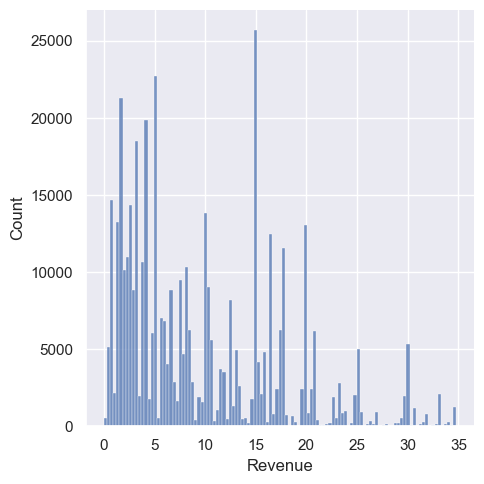

In [11]:
sns.displot(data_cleaned_linear['Revenue'])

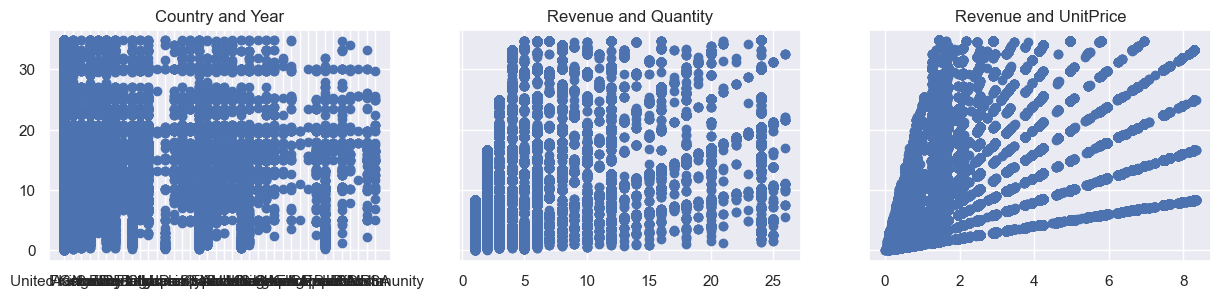

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned_linear['Country'],data_cleaned_linear['Revenue'])
ax1.set_title('Country and Year')
ax2.scatter(data_cleaned_linear['Quantity'],data_cleaned_linear['Revenue'])
ax2.set_title('Revenue and Quantity')
ax3.scatter(data_cleaned_linear['UnitPrice'],data_cleaned_linear['Revenue'])
ax3.set_title('Revenue and UnitPrice')


plt.show()

### Insights
Country and Revenue (First Plot):
1) The "Country" feature may not have a direct linear relationship with "Revenue".<br>
2) If you plan to use "Country" for regression, consider encoding it as a categorical variable or exploring interactions with other features.<br>
3) The scatter plot shows a broad distribution of points without any clear linear pattern.<br>


UnitPrice and Revenue (Third Plot):
1) The scatter plot shows diagonal lines, likely because "Revenue" might be derived as Quantity × UnitPrice.<br>

In [13]:
data_cleaned_linear['log_revenue'] = np.log(data_cleaned_linear['Revenue'])
data_cleaned_linear

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log,log_revenue
0,536365,85123A,6,2.55,United Kingdom,2010,1,2,1,8,15.30,2.791165,2.727853
1,536365,71053,6,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583,3.012589
2,536365,84406B,8,2.75,United Kingdom,2010,1,2,1,8,22.00,3.135494,3.091042
3,536365,84029G,6,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583,3.012589
4,536365,84029E,6,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583,3.012589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439805,581587,22613,12,0.85,France,2011,9,37,0,12,10.20,2.415914,2.322388
439806,581587,22899,6,2.10,France,2011,9,37,0,12,12.60,2.610070,2.533697
439807,581587,23254,4,4.15,France,2011,9,37,0,12,16.60,2.867899,2.809403
439808,581587,23255,4,4.15,France,2011,9,37,0,12,16.60,2.867899,2.809403


In [14]:
data_cleaned_linear.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour', 'Revenue', 'Revenue_log',
       'log_revenue'],
      dtype='object')

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# since there are categorical data , we will only take the numerical ones
variables = data_cleaned_linear[["Quantity", "UnitPrice", "Year", "Hour", "Revenue","Revenue_log", "Month", "Week", "DayOfWeek"]]

# we create a new data frame which will include all the VIFs
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [16]:
vif

,VIF,Features
0,5.803521,Quantity
1,6.682231,UnitPrice
2,61.863008,Year
3,32.191600,Hour
4,20.427823,Revenue
5,79.308867,Revenue_log
6,137.807534,Month
7,122.749321,Week
8,2.949789,DayOfWeek


### VIF AND INSIGHTS
The Variance Inflation Factor (VIF) values you calculated indicate the level of multicollinearity among your features. In linear regression, multicollinearity can lead to unreliable coefficient estimates, which makes the model less interpretable and stable.<BR>

Key Observations:
1) VIF > 10 indicates high multicollinearity.<BR>
Month (137.8) and Week (122.7) are extremely high.<BR>
Year (51.9), Hour (32.1), and Revenue_log (21.9) also have high VIF values.<BR>
2) VIF between 5 and 10 indicates moderate multicollinearity.<BR>
Quantity (5.8) and UnitPrice (6.5) are moderately collinear.<BR>
3) Low VIF (< 5) is generally acceptable.<BR>
DayOfWeek (2.9) is within acceptable limits.<BR>


In [17]:
# Drop high VIF columns
variables_reduced = variables.drop(columns=['Year', 'Hour', 'Revenue','Revenue_log','Month', 'Week'])

# Recalculate VIF to verify
vif_reduced = pd.DataFrame()
vif_reduced["VIF"] = [variance_inflation_factor(variables_reduced.values, i) for i in range(variables_reduced.shape[1])]
vif_reduced["Features"] = variables_reduced.columns

print(vif_reduced)


        VIF   Features
0  1.447738   Quantity
1  1.695034  UnitPrice
2  2.125887  DayOfWeek


### Insights
Now the VIF values for these columns are Normal. So we can process these columns for linear regression

### Selecting Columns with Normal VIF (Removing the effect of Multicollinearity)

In [18]:
data_no_multicollinearity = data_cleaned_linear.drop(['Year', 'Hour', 'Revenue','Revenue_log','Month', 'Week'],axis=1)

In [19]:
data_cleaned_linear.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country', 'Year',
       'Month', 'Week', 'DayOfWeek', 'Hour', 'Revenue', 'Revenue_log',
       'log_revenue'],
      dtype='object')

### Checking the Dataset

In [20]:
data_no_multicollinearity.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'Country',
       'DayOfWeek', 'log_revenue'],
      dtype='object')

### Label Encoding For Linear Regression

In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to StockCode and Country in data_cleaned
data_no_multicollinearity['StockCode'] = label_encoder.fit_transform(data_cleaned['StockCode'])
data_no_multicollinearity['Country'] = label_encoder.fit_transform(data_cleaned['Country'])
data_no_multicollinearity['InvoiceNo'] = label_encoder.fit_transform(data_cleaned['InvoiceNo'])

In [22]:
data_no_multicollinearity.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,DayOfWeek,log_revenue
0,0,3210,6,2.55,36,1,2.727853
1,0,2571,6,3.39,36,1,3.012589
2,0,2786,8,2.75,36,1,3.091042
3,0,2735,6,3.39,36,1,3.012589
4,0,2734,6,3.39,36,1,3.012589


### Insights
We created Dummies(labels) for Categorical Columns

### Feature Selection(Selecting Dependent and Independent Variables)

In [23]:
# The target(s) (dependent variable) is 'log price'
targets = data_no_multicollinearity['log_revenue']

# The inputs are everything Except the dependent variable, so we can simply drop it
inputs = data_no_multicollinearity.drop(['log_revenue'],axis=1)

In [24]:
inputs.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,DayOfWeek
0,0,3210,6,2.55,36,1
1,0,2571,6,3.39,36,1
2,0,2786,8,2.75,36,1
3,0,2735,6,3.39,36,1
4,0,2734,6,3.39,36,1


### Standardization for Linear Regression

In [25]:
# Create a scaler object
scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler()

In [26]:
# Scale the features and store them in a new variable
inputs_scaled = scaler.transform(inputs)

### Split the variables with an 80-20 split and some random state

In [27]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state= 42)

### Create a linear regression object

In [28]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

### Predicting Training Data Outcomes Using the Regression Model


In [29]:
y_hat = reg.predict(x_train)

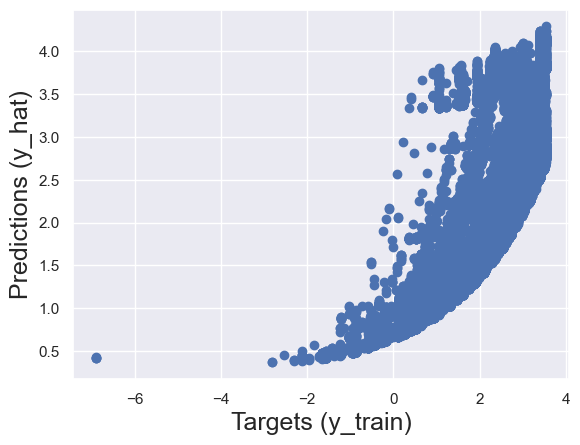

In [30]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)


plt.show()



It shows Linearity


### Predicting Test Data Outcomes Using the Regression Model


In [31]:
y_hat_test = reg.predict(x_test)

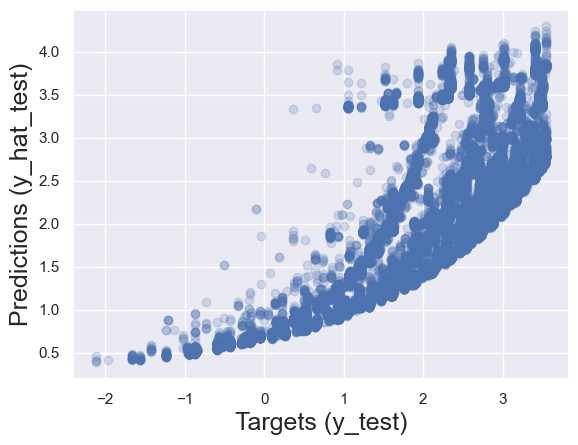

In [32]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

### Insights
A wider spread, especially at higher values, might suggest heteroscedasticity (where variance of errors increases with the value of the target).

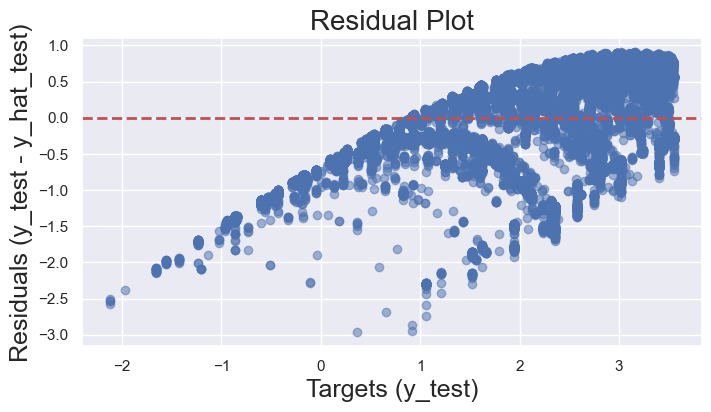

In [33]:
# Calculate residuals
residuals = y_test - y_hat_test

# Plot residuals
plt.figure(figsize=(8, 4))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Residuals (y_test - y_hat_test)', size=18)
plt.title('Residual Plot', size=20)
plt.show()

### Recommendations
Transform Variables: Consider transforming the dependent or independent variables (e.g., using log, square root, or polynomial features) to better model non-linear relationships.<br>
Try Alternative Models: A non-linear regression model, such as polynomial regression or a machine learning model (e.g., random forest or gradient boosting), might perform better.<br>

In [34]:
reg.score(x_train, y_train)

0.6403681053742813

In [35]:
reg.score(x_test, y_test)

0.6423977421346643

In [36]:
# Calculate R² using reg.score
r2_train = reg.score(x_train, y_train)

# Calculate MSE and RMSE metrics
mse_train = mean_squared_error(y_train, y_hat)
rmse_train = mse_train ** 0.5

print("Training Metrics:")
print("R-squared (R²) on Training Data:", r2_train)
print("Mean Squared Error (MSE) on Training Data:", mse_train)
print("Root Mean Squared Error (RMSE) on Training Data:", rmse_train)

Training Metrics:
R-squared (R²) on Training Data: 0.6403681053742813
Mean Squared Error (MSE) on Training Data: 0.35098188992464546
Root Mean Squared Error (RMSE) on Training Data: 0.5924372455582494


### Insights and Recommendations
While 54.5% is a reasonable fit for some real-world datasets, it suggests there’s still 45.5% of variance unexplained, possibly due to missing features, nonlinear relationships, or noise in the data.<br>
If this is low for your use case, consider improving the model by adding features, transforming existing ones, or trying a more complex model.<br>

### K- Means Clusterring

In [152]:
data_cleaned = pd.read_csv("F:\\New folder\\AI.csv")
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,2010,1,2,1,8,15.30,2.791165
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,2010,1,2,1,8,22.00,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583


In [153]:
# Group by 'Country' and calculate the average of 'Revenue'
average_revenue = data_cleaned.groupby('Country')['Revenue'].mean().reset_index()

# Rename the column for clarity
average_revenue.columns = ['Country', 'Average Revenue']

# Display the result
print(average_revenue)

                 Country  Average Revenue
0              Australia        15.910748
1                Austria        16.294134
2                Bahrain        20.870000
3                Belgium        15.883972
4                 Brazil        18.924545
5                 Canada        15.294677
6        Channel Islands        17.566731
7                 Cyprus        13.901975
8         Czech Republic        18.720000
9                Denmark        17.343144
10                  EIRE        16.178408
11    European Community        18.016304
12               Finland        16.200398
13                France        15.440405
14               Germany        15.773200
15                Greece        15.535596
16             Hong Kong        18.279882
17               Iceland        17.371800
18                Israel        15.607290
19                 Italy        17.674746
20                 Japan         8.043820
21               Lebanon        18.492609
22             Lithuania        19

In [154]:
from sklearn.cluster import KMeans

In [155]:
# Assuming 'data' is your DataFrame and includes 'Average Revenue' and 'Quantity'
X = average_revenue[['Average Revenue']].values


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

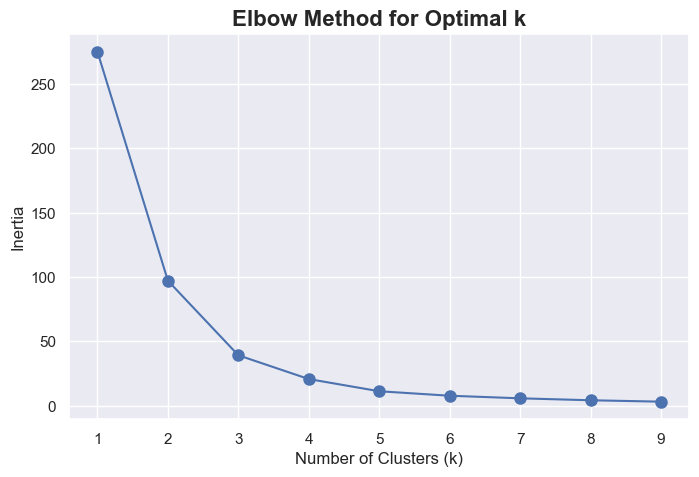

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [156]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k',fontsize = 16, fontweight='bold')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose an optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
average_revenue['Cluster'] = kmeans.fit_predict(X)



In [157]:
# View clustered data
print(average_revenue[['Average Revenue','Cluster']])

    Average Revenue  Cluster
0         15.910748        2
1         16.294134        2
2         20.870000        0
3         15.883972        2
4         18.924545        0
5         15.294677        2
6         17.566731        0
7         13.901975        2
8         18.720000        0
9         17.343144        0
10        16.178408        2
11        18.016304        0
12        16.200398        2
13        15.440405        2
14        15.773200        2
15        15.535596        2
16        18.279882        0
17        17.371800        0
18        15.607290        2
19        17.674746        0
20         8.043820        1
21        18.492609        0
22        19.770000        0
23        16.015978        2
24        12.137331        1
25        17.117616        0
26        16.819918        2
27        14.006478        2
28        16.330417        2
29        16.213333        2
30        18.074141        0
31        13.557780        2
32        17.022311        0
33        15.9

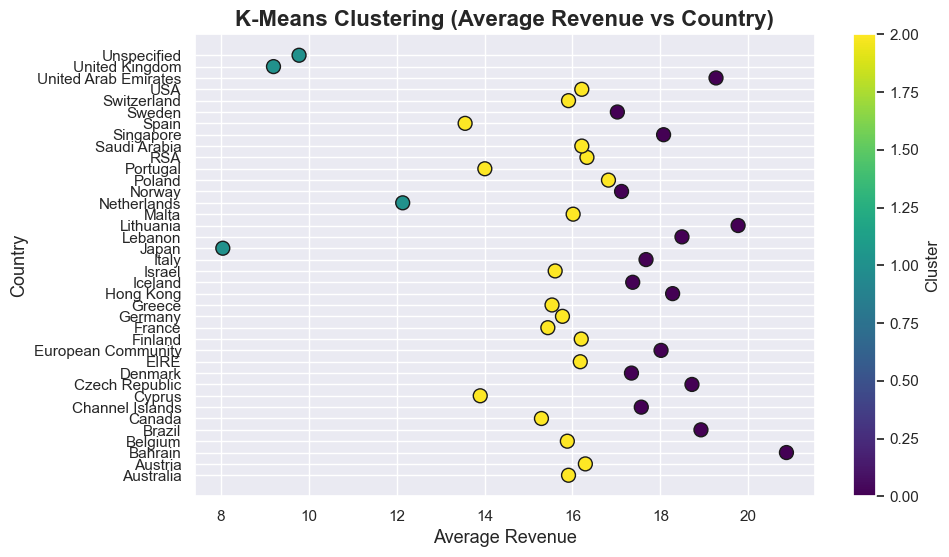

In [158]:
# Scatter plot for Average Revenue vs Quantity
plt.figure(figsize=(10, 6))
plt.scatter(average_revenue['Average Revenue'], average_revenue['Country'], c= average_revenue['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.xlabel('Average Revenue', fontsize = 13)
plt.ylabel('Country', fontsize = 13)
plt.title('K-Means Clustering (Average Revenue vs Country)',fontsize = 16, fontweight = 'bold' )
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Insights 
1. The CLuster size we took is 3, So there are  colours(Purple, Yellow, Green).<Br>
2. The 3 Cluster represents high, medium and low average Revenue Countries.<Br>
3. The average revenue is calculated by the mean (average) of the 'Revenue' column for each group (country).<br>
Mathematically, the mean is:<br>
    
Mean Revenue = Sum of Revenue for a Country/Number of Rows for that Country<br>
So the no. of number of rows for that country is decided by number of Stockcodes.<br>
   
     
 
​
 


### Recommendations
If We Increase the total no. of Stokes for low average revenue countries we can see the rise.<br>
Also if we decrease the UnitPrice, more quantity will be Sold.<br>

In [159]:
# Group by 'Country' and calculate the average of 'Revenue'
average_revenue_hour = data_cleaned.groupby('Hour', as_index=False)['Revenue'].mean()

# Rename the 'Revenue' column to 'Average Revenue'
average_revenue_hour.rename(columns={'Revenue': 'Average Revenue'}, inplace=True)

# Display the new DataFrame with 'Country' and 'Average Revenue' columns
print(average_revenue_hour)

    Hour  Average Revenue
0      6         4.250000
1      7        17.607469
2      8        16.556581
3      9        12.424155
4     10        12.529239
5     11         9.945027
6     12         9.825645
7     13         9.753011
8     14         9.827513
9     15         8.532920
10    16         7.244894
11    17         7.343396
12    18         7.434323
13    19         7.445429
14    20         6.078506


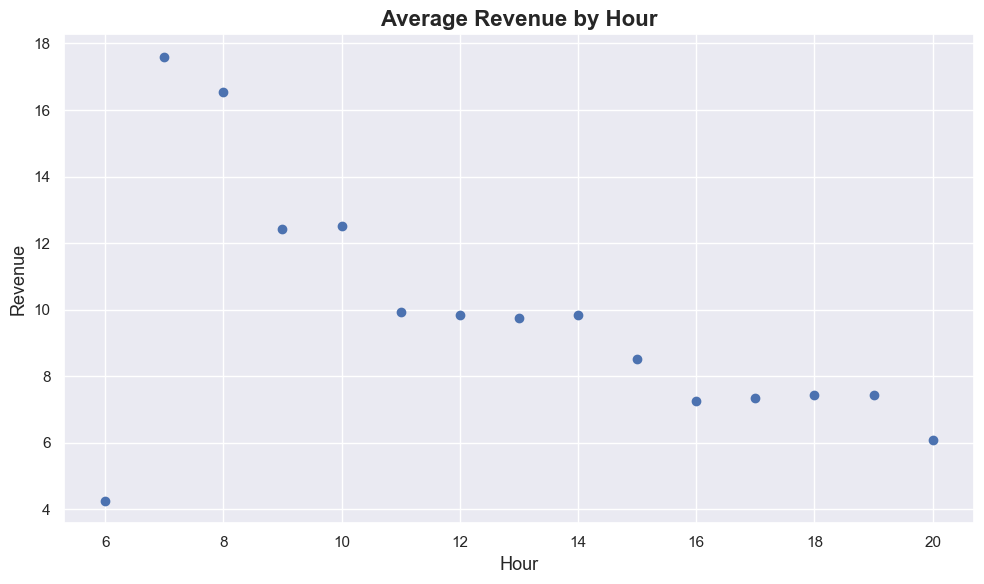

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(average_revenue_hour['Hour'], average_revenue_hour['Average Revenue'], color='b')

# Labeling the plot
plt.title('Average Revenue by Hour', fontsize = 16, fontweight= 'bold')
plt.xlabel('Hour', fontsize = 13)
plt.ylabel('Revenue',  fontsize = 13)

# Show the plot
plt.tight_layout()
plt.show()

In [161]:
X = average_revenue_hour[['Average Revenue']].values

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

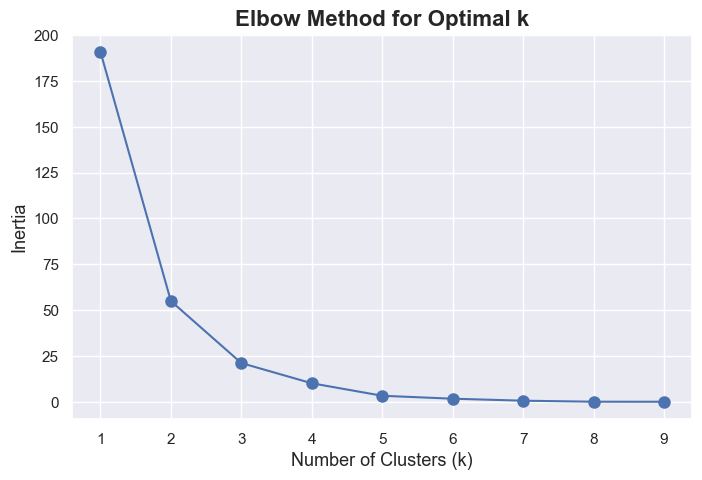

    Average Revenue  Cluster
0          4.250000        0
1         17.607469        2
2         16.556581        2
3         12.424155        1
4         12.529239        1
5          9.945027        3
6          9.825645        3
7          9.753011        3
8          9.827513        3
9          8.532920        3
10         7.244894        0
11         7.343396        0
12         7.434323        0
13         7.445429        0
14         6.078506        0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [162]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=13)
plt.ylabel('Inertia',fontsize=13)
plt.title('Elbow Method for Optimal k', fontsize=16, fontweight='bold')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose an optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=4, random_state=42)
average_revenue_hour['Cluster'] = kmeans.fit_predict(X)

# View clustered data
print(average_revenue_hour[['Average Revenue','Cluster']])


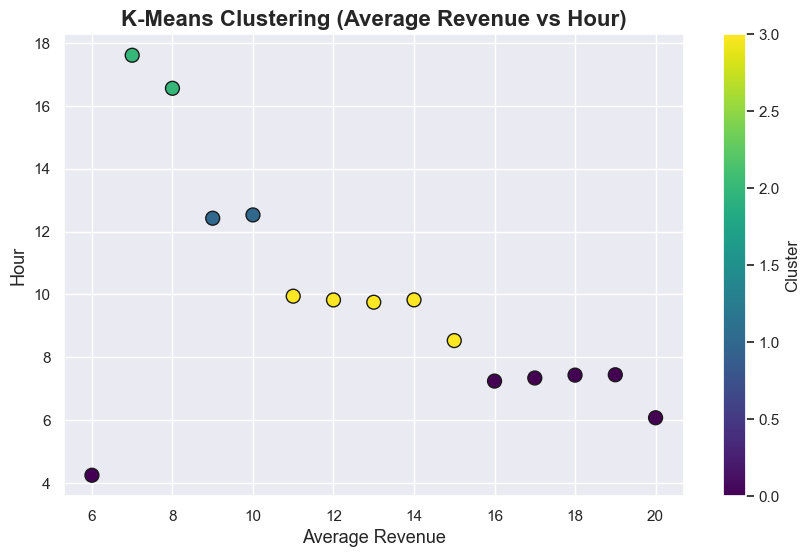

In [163]:
# Scatter plot for Average Revenue vs Quantity
plt.figure(figsize=(10, 6))
plt.scatter(average_revenue_hour['Hour'], average_revenue_hour['Average Revenue'], c= average_revenue_hour['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.xlabel('Average Revenue', fontsize = 13)
plt.ylabel('Hour', fontsize = 13)
plt.title('K-Means Clustering (Average Revenue vs Hour)',fontsize = 16, fontweight = 'bold' )
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Insights
1. We took cluster size as 4. So there are 4 Colours(Clusters) in the Graph.<br>
2. The Reason for choosing cluster size of 4 is because there are 4 Time Frames in a Day(morning, afternoon, evening, and night).<br>
3. From this, we can see purchases are more at morning and low at afternoon and night.<br>
4. As the hour increases, the revenue decreases(low no of purchases).<br>

### Recommendations
Decrease the Unitprice for the products at night,so that the customers will buy more Quanttiy. The Quantity has the highest correlation with Revenue So if it increases Revenue will be more at afternoon and night time also.<br>

### Random Forest Classification

In [164]:
from sklearn.ensemble import RandomForestClassifier  

In [10]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to StockCode and Country in data_cleaned
data_cleaned['StockCode'] = label_encoder.fit_transform(data_cleaned['StockCode'])
data_cleaned['Country'] = label_encoder.fit_transform(data_cleaned['Country'])
data_cleaned['InvoiceNo'] = label_encoder.fit_transform(data_cleaned['InvoiceNo'])

In [166]:
data_RF = data_cleaned.drop(['Revenue_log','Description','InvoiceDate'], axis = 1)

In [167]:
data_RF.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue
0,0,3210,6,2.55,36,2010,1,2,1,8,15.30
1,0,2571,6,3.39,36,2010,1,2,1,8,20.34
2,0,2786,8,2.75,36,2010,1,2,1,8,22.00
3,0,2735,6,3.39,36,2010,1,2,1,8,20.34
4,0,2734,6,3.39,36,2010,1,2,1,8,20.34


In [168]:
### Selecting Features for RF

In [169]:
X = data_RF.drop('Revenue', axis=1)  # Replace 'target_column' with your actual target column name
y = data_RF['Revenue']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization for RF

In [171]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
X_train.dtypes

InvoiceNo      int64
StockCode      int32
Quantity       int64
UnitPrice    float64
Country        int32
Year           int64
Month          int64
Week           int64
DayOfWeek      int64
Hour           int64
dtype: object

In [173]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [174]:
# Make predictions
y_pred = rf_regressor.predict(X_test_scaled)

In [175]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.00022182991446420273
Root Mean Squared Error (RMSE): 0.01489395563523011
R-squared (R²): 0.9999962754589254


### Insights 
1) Excellent Fit:<br>
The Random Forest model is performing extremely well on the training data, capturing nearly all the variance and making highly accurate predictions.<br>
2) Overfitting Risk:<br>
The near-perfect fit raises the likelihood of overfitting, where the model memorizes the training data but struggles to generalize to unseen test data.<br>
Random Forests, being highly flexible, are prone to overfitting if not regularized.<br>
3) Bias-Variance Tradeoff:<br>
The model has very low bias (fits training data perfectly). Ensure the variance is not too high by checking test set metrics.<br>

### Recommendations
1) Evaluate on Test Data
2) Hyperparameter Tuning




In [176]:
X_train.head()


,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour
306871,12891,1754,12,1.95,36,2011,6,23,4,11
337059,13979,1045,6,1.95,36,2011,10,43,1,12
151811,6368,1341,1,2.10,36,2011,5,19,4,13
407028,16510,490,1,3.29,36,2011,11,47,4,16
275916,11741,1972,1,4.15,36,2011,9,37,3,13


In [177]:
new_data = pd.DataFrame({
    'InvoiceNo': [6368, 11741],
    'StockCode': ['1341', '1972'],
    'Quantity': [1, 1],
    'UnitPrice': [2.10, 4.15],
    'Country': [36, 36],
    'Year': [2011, 2011],
    'Month': [5, 9],
    'Week': [19, 37],
    'DayOfWeek': [4, 3],
    'Hour': [13, 13]
})

In [65]:
predictions = rf_regressor.predict(new_data)

NameError: name 'rf_regressor' is not defined

In [64]:
print("Predictions for new data:", predictions)


Predictions for new data: [34.7128 34.7128]


In [11]:
data_RF1 = data_cleaned.drop(['Revenue','Description','InvoiceDate'], axis = 1)

In [12]:
data_RF1.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue_log
0,0,3210,6,2.55,36,2010,1,2,1,8,2.791165
1,0,2571,6,3.39,36,2010,1,2,1,8,3.060583
2,0,2786,8,2.75,36,2010,1,2,1,8,3.135494
3,0,2735,6,3.39,36,2010,1,2,1,8,3.060583
4,0,2734,6,3.39,36,2010,1,2,1,8,3.060583


In [13]:
X = data_RF1.drop('Revenue_log', axis=1)  # Replace 'target_column' with your actual target column name
y = data_RF1['Revenue_log']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train.dtypes

InvoiceNo      int64
StockCode      int32
Quantity       int64
UnitPrice    float64
Country        int32
Year           int64
Month          int64
Week           int64
DayOfWeek      int64
Hour           int64
dtype: object

In [184]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [185]:
# Make predictions
y_pred = rf_regressor.predict(X_test_scaled)

In [186]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 2.123368596565626e-06
Root Mean Squared Error (RMSE): 0.0014571782995109507
R-squared (R²): 0.9999966630910481


In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}



In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)



Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [ ]:
# Use the best model found by GridSearchCV
best_rf_regressor = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize and train the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 2.1068344293732736e-06
Root Mean Squared Error (RMSE): 0.0014514938612936927
R-squared (R²): 0.9999966890747659


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [28]:
# Instantiate Random Forest
rf_reg = RandomForestRegressor(random_state=42)


In [ ]:
# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2')  # Use 'r2' or other regression metrics
grid_search.fit(X_train, y_train)




In [ ]:
# Best model
best_rf = grid_search.best_estimator_

# Validate
y_pred = best_rf.predict(X_test)
print("Validation R^2 Score:", grid_search.best_score_)
